# Tokyo Real Estate

**Progetto per esame di Applicazioni Data Intensive**  
Laurea in Ingegneria e Scienze Informatiche  
DISI - Università di Bologna, Cesena

Studente: Simone Carpi   
Email: simone.carpi@studio.unibo.it
___

In questa prima cella verranno scaricate le principali 
librerie che saranno necessarie per il funzionamento del progetto.   
Ad ogni libreria verrà assegnato un *alias* così da rendere
più semplice il loro utilizzo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Inoltre, si installa il pacchetto `kagglehub` per poter importare il dataset di riferimento.

In [3]:
%pip install kagglehub[pandas-datasets]

Note: you may need to restart the kernel to use updated packages.


___
## Caso Di Studio: Predire il prezzo di un edificio nella città di Tokyo

Il progetto si pone come obiettivo quello di poter stimare il **valore** di mercato a cui sarà venduto un'immobile, da un'agenzia immobiliare, presso la città di Tokyo, gigantesca megalopoli e cuore pulsante del Giappone.

### Caricamento Dati
I dati sono stati ricavati dal sito web **Kaggle** e dal dataset sulle transazioni immobiliari giapponesi avvenute tra il *2005* e il *2019/2020*. In seguito si lascia il link da cui poter ottenere le osservazioni che saranno prese in considerazione per lo sviluppo del progetto.

* https://www.kaggle.com/datasets/nishiodens/japan-real-estate-transaction-prices

A seguire vengono eseguite le istruzioni necessarie per scaricare localmente i file presenti nella base dati di riferimento.

**La cella che segue deve essere eseguita nel caso si voglia avere in locale il dataset di riferimento.**

In [43]:
# Da eseguire se non è esplicitamente presente il dataset a disposizione
import kagglehub

# Si scarica il dataset
path = kagglehub.dataset_download("nishiodens/japan-real-estate-transaction-prices")

print("Path to dataset files:", path)

100%|██████████| 97.3M/97.3M [00:03<00:00, 30.6MB/s]

Extracting files...


Path to dataset files: C:\Users\simoc\.cache\kagglehub\datasets\nishiodens\japan-real-estate-transaction-prices\versions\1


___
Il dataset scaricato sarà memorizzato in una particolare cartella chiamata *kagglehub*, perciò è necessario che i dati ottenuti vengano copiati all'interno della cartella di lavoro. Nella cartella **trade_prices** sono presenti numerosi file riguardanti diverse città giapponese, quella a cui facciamo riferimento è: $\color{red}{\text{"13.csv"}}$, si riferisce alla città di Tokyo.

Si importa il modulo `os` che permette di eseguire dei comandi in una subshell e tramite un metodo si copia il contenuto del file $\color{red}{\text{"13.csv"}}$ all'interno di un altro file, in questo caso denominato **tokyo.csv**.

**La cella che segue è da eseguire solo se si è scaricato in locale il file precedentemente scaricato.**

In [9]:
# Da eseguire solo se si è scaricato in locale il dataset tramite i comandi esplicitati precedentemente
import os

# Modificare i percosi in base alle proprie directory. Il file è stato chiamato "tokyo.csv"
# Su Linux
os.system('cp C:/Users/simoc/.cache/kagglehub/datasets/nishiodens/japan-real-estate-transaction-prices/versions/1/trade_prices/13.csv C:/Users/simoc/Desktop/Data Intensive/Progetto Esame/tokyo.csv')

# Su Windows
# os.system('copy C:/Users/simoc/.cache/kagglehub/datasets/nishiodens/japan-real-estate-transaction-prices/versions/1/trade_prices/13.csv C:/Users/simoc/Desktop/Data Intensive/Progetto Esame/tokyo.csv')

1

___
*Iniziare ad eseguire da qui nel caso in cui sia già presente il dataset di riferimento.*

Dopo aver importato il dataset, tramite la funzione `read_csv` di Pandas, si caricano i dati del file CSV in un Dataframe comune che verrà chiamato *tokyo_data*.

In [43]:
import os.path

# Nome assegnato al file importato
path = "tokyo.csv";

# Dataframe che dovrà contenere tutti i record dei vari file
tokyo_data = pd.DataFrame()

# In seguito, il file CSV viene racchiuso nel DataFrame principale tokyo_data.
if os.path.exists(path):
    tokyo_data = pd.read_csv(path)

Per dare una piccola occhiata al contenuto si mostra il DataFrame che è stato appena riempito.

In [46]:
tokyo_data

,No,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,...,Classification,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks
0,1,"Pre-owned Condominiums, etc.",NaN,13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,4,4.0,...,NaN,NaN,Commercial Zone,80.0,500.0,3rd quarter 2019,2019,3,Not yet,NaN
1,2,"Pre-owned Condominiums, etc.",NaN,13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,4,4.0,...,NaN,NaN,Commercial Zone,80.0,500.0,3rd quarter 2019,2019,3,Done,NaN
2,3,Residential Land(Land and Building),Commercial Area,13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,2,2.0,...,Ward Road,4.0,Commercial Zone,80.0,500.0,2nd quarter 2019,2019,2,NaN,NaN
3,4,Residential Land(Land and Building),Commercial Area,13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,1,1.0,...,Tokyo Metropolitan Road,27.0,Commercial Zone,80.0,700.0,2nd quarter 2019,2019,2,NaN,NaN
4,5,"Pre-owned Condominiums, etc.",NaN,13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,4,4.0,...,NaN,NaN,Commercial Zone,80.0,500.0,2nd quarter 2019,2019,2,Done,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406570,406571,Residential Land(Land Only),Potential Residential Area,13421,Tokyo,Ogasawara Village,Chichijima,NaN,NaN,NaN,...,NaN,NaN,Non-divided City Planning Area,70.0,200.0,1st quarter 2007,2007,1,NaN,NaN
406571,406572,Residential Land(Land Only),Potential Residential Area,13421,Tokyo,Ogasawara Village,Chichijima,NaN,NaN,NaN,...,Village Road,5.5,Non-divided City Planning Area,70.0,200.0,1st quarter 2007,2007,1,NaN,NaN
406572,406573,Residential Land(Land Only),Residential Area,13421,Tokyo,Ogasawara Village,Hahajima,NaN,NaN,NaN,...,Village Road,4.8,Non-divided City Planning Area,70.0,200.0,3rd quarter 2008,2008,3,NaN,Dealings of adjacent land
406573,406574,Residential Land(Land Only),Potential Residential Area,13421,Tokyo,Ogasawara Village,Hahajima,NaN,NaN,NaN,...,NaN,NaN,Non-divided City Planning Area,70.0,200.0,4th quarter 2007,2007,4,NaN,Dealings of adjacent land


Al fine di ridurre il numero di campi presenti, siccome il dataset è molto grande, si è deciso di eliminare le colonne considerate irrilevanti ai fini dell'elaborato e dell'analisi. Viene eseguita la funzione `drop` con attributo `inplace` per sostituire il contenuto del frame.

In [49]:
tokyo_data.drop(columns=["No",  # Numero riga 
                         #"Type", # Tipo di immobile (compreso il terreno)
                         "DistrictName", # Nome del distretto
                         "MunicipalityCode", # Codice Municipality
                         "NearestStation", # Nome stazione più vicina
                         "TimeToNearestStation", # Tempo per stazione più vicina (espresso in modo strano)
                         "MaxTimeToNearestStation", # Massimo tempo
                         "FloorPlan", # Organizzazione giapponese casa
                         "Prefecture", # Prefettura Giapponese
                         "UnitPrice", # Prezzo al metro quadro
                         "PricePerTsubo", # Costo per Tsubo (unità di misura giapponese)
                         "AreaIsGreaterFlag", # Area superiore a 2000m^2
                         #"Frontage", # Facciata in metri
                         "FrontageIsGreaterFlag", # Facciata maggiore di 50m
                         #"TotalFloorArea", #Area totale
                         "TotalFloorAreaIsGreaterFlag", # Area totale maggiore di 2000m^2
                         #"Structure", # Materiali da costruzione
                         #"Use", # Utilizzo attuale
                         "Direction", # Direzione della strada di servizio
                         #"Breadth", # Larghezza della strada di servizio
                         #"Classification", # Classe della strada di accesso
                         "Period" , # Periodo dell'avvenuta transazione
                         "CityPlanning", # Pianificazione della città
                         #"CoverageRatio", # Percentuale superficie edificio
                         #"FloorAreaRatio", # Percentuale superficie dei piani
                         #"Year", # Anno della transazione
                         #"Quarter", # Trimestre della transazione
                         "Renovation", # Ristrutturato o meno
                         "Remarks" #  Note
                        ],
                inplace=True)

Per capire se presenti o meno i dati da osservare, si è deciso di mostrare il numero di valori nulli ($\color{red}{\text{"Null"}}$) e non nulli ($\color{red}{\text{"Not Null"}}$) per ognuno dei campi scelti.

In [52]:
pd.merge(
    pd.Series(tokyo_data.isna().sum(), name="Null"), 
    pd.Series(tokyo_data.notna().sum(), name="Not Null"), 
    left_index=True, right_index=True
)

,Null,Not Null
Type,0,406575
Region,184871,221704
Municipality,0,406575
MinTimeToNearestStation,10339,396236
TradePrice,0,406575
Area,0,406575
LandShape,185273,221302
Frontage,203688,202887
TotalFloorArea,270150,136425
BuildingYear,92279,314296


Il campo che vogliamo valutare `TradePrice` è sempre presente, però numerose informazioni pertinenti mancano, quindi è necessario filtrare il DataFrame per fare in modo che i dati necessari siano tutti presenti. Si è deciso di lavorare sui soli immobili che rappresentano delle case abitative definite dai campi: `Use` e `Purpose`, entrambi con valore $\color{red}{\text{"House"}}$ (l'utilizzo attuale della casa corrisponde allo stesso per cui sarà venduta, in un futuro).    
Inoltre, data la presenza di valori nulli si è pensato di eliminare tutti i record contenti tipi *null* or *NaN* perchè molti di questi campi sono categorici e assumere il tipo/valore di ogni record sarebbe una scelta azzardata e difficile da ricavare, o perlomeno è stata considerata come la scelta più appropriata. In effetti, si sarebbe potuto raggruppare per `Municipality` e completare i valori mancanti con i valori più frequenti, o persino creare una nuova categoria per gruppo. (K-Nearest-Neighbor ?)   
Per quanto riguarda il tempo (`MinTimeToNearestStation`) si sarebbe potuto assegnare un valore molto alto ai tempi relativi la distanza dalla stazione siccome molte case presenti in determinati quartieri non hanno nessun valore in questo campo.

Il nuovo dataframe è ottenuto tramite un filtro sul precedente relativamente a `Purpose` e `Use`, per poi eliminare tutti i record contententi valori non presenti

In [56]:
tokyo_data = tokyo_data.loc[(tokyo_data["Purpose"] == "House") & (tokyo_data["Use"] == "House")].dropna()

In questo modo tutti i dati necessari sono presenti.

In [59]:
tokyo_data.count()

Type                       34376
Region                     34376
Municipality               34376
MinTimeToNearestStation    34376
TradePrice                 34376
Area                       34376
LandShape                  34376
Frontage                   34376
TotalFloorArea             34376
BuildingYear               34376
PrewarBuilding             34376
Structure                  34376
Use                        34376
Purpose                    34376
Classification             34376
Breadth                    34376
CoverageRatio              34376
FloorAreaRatio             34376
Year                       34376
Quarter                    34376
dtype: int64

Si elimina la colonna `Type` perchè tutte uguali e le colonne `Purpose` e `Use` che sono i filtri.

In [62]:
tokyo_data["Type"].value_counts()

Type
Residential Land(Land and Building)    34376
Name: count, dtype: int64

In [64]:
tokyo_data.drop(columns=["Type", "Purpose", "Use"], inplace=True)

In seguito viene mostrato il frame completo, con valori presenti e tipologia. In questo caso si può notare che i tipi sono stati dedotti da pandas e per questo motivo è necessario effettuare un ri-assegnamento del tipo alle variabili.

In [67]:
tokyo_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 34376 entries, 381 to 396602
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Region                   34376 non-null  object 
 1   Municipality             34376 non-null  object 
 2   MinTimeToNearestStation  34376 non-null  float64
 3   TradePrice               34376 non-null  int64  
 4   Area                     34376 non-null  int64  
 5   LandShape                34376 non-null  object 
 6   Frontage                 34376 non-null  float64
 7   TotalFloorArea           34376 non-null  float64
 8   BuildingYear             34376 non-null  float64
 9   PrewarBuilding           34376 non-null  int64  
 10  Structure                34376 non-null  object 
 11  Classification           34376 non-null  object 
 12  Breadth                  34376 non-null  float64
 13  CoverageRatio            34376 non-null  float64
 14  FloorAreaRatio          

Quindi, per concludere, è necessario effettuare le giuste conversioni di tipo in modo da poter utilizzare in maniera più efficiente la memoria.

In [70]:
# Si effettuano le ultime conversioni di tipo.
tokyo_data = tokyo_data.astype({"Region": "category",
                                "Municipality": "category",
                                "MinTimeToNearestStation": int,
                                "TradePrice": float,
                                "Area": float,
                                "LandShape": "category",
                                "Frontage": float,
                                "TotalFloorArea": float,
                                "BuildingYear": int,
                                "PrewarBuilding": bool,
                                "Structure": "category",
                                "Classification": "category",
                                "Breadth": float,
                                "CoverageRatio": float,
                                "FloorAreaRatio": float,
                                "Year": int,
                                "Quarter": int})

Per garantire una corretta comprensione dei valori presenti nei dati, è stata effettuata anche una conversione di valuta poichè i prezzi presenti sono espressi in **¥** (*yen*, moneta giapponese) e non in euro **€**.

In [73]:
# Si effettuano le conversioni dei prezzi da yen (valuta giapponese) ad euro.
# Si prende come valore di cambio quello del 25/5/2025 -> 1€ == 165.05¥ (si approssima a 165)
tokyo_data["TradePrice"] = tokyo_data["TradePrice"] / 165

Tramite la funzione `Info` è possibile ottenere il tipo delle colonne caricate in *tokyo_data* e il peso del DataFrame stesso. Con la conversione di tipo si può notare una drastica riduzione di memoria occupata dal dataframe.

In [76]:
tokyo_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 34376 entries, 381 to 396602
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Region                   34376 non-null  category
 1   Municipality             34376 non-null  category
 2   MinTimeToNearestStation  34376 non-null  int32   
 3   TradePrice               34376 non-null  float64 
 4   Area                     34376 non-null  float64 
 5   LandShape                34376 non-null  category
 6   Frontage                 34376 non-null  float64 
 7   TotalFloorArea           34376 non-null  float64 
 8   BuildingYear             34376 non-null  int32   
 9   PrewarBuilding           34376 non-null  bool    
 10  Structure                34376 non-null  category
 11  Classification           34376 non-null  category
 12  Breadth                  34376 non-null  float64 
 13  CoverageRatio            34376 non-null  float64 
 14  FloorAre

### Campi
Le colonne si suddividono in:

1) `Region`: Caratteristiche dell'area attorno l'immobile;
2) `Municipality`: Quartiere;
3) `MinTimeToNearestStation`: Tempo minimo necessario per raggiungere la stazione più vicina;
4) `TradePrice`: Prezzo Commerciale;
5) `Area`: Superficie dell'immobile presa in considerazione;
6) `LandShape`: Forma del terreno;
7) `Frontage`: Lunghezza della facciata, lato terreno che confina con la strada;
8) `TotalFloorArea`: Area totale;
9) `BuildingYear`: Anno di costruzione dell'edificio;
10) `PrewarBuilding`: Edifici costruiti prima del 1945;
11) `Structure`: Materiali utilizzati per la costruzione dell'edificio;
12) `Classification`: Tipologia della strada di accesso;
13) `Breadth`: Larghezza della strada di servizio;
14) `CoverageRatio`: Copertura dell'edificio in percentuale;
15) `FloorAreaRatio`: Superficie utile in percentuale;
16) `Year`: Anno in cui è avvenuta la transazione;
17) `Quarter`: Trimestre in cui è avvenuta la transazione;

Le unità di misura prese in considerazione sono:

* `Minuti` -> Tempo necessario per raggiungere la stazione;
* `m` -> Larghezza della strada di servizio o lunghezza della facciata;
* `m^2` -> (${m}^2$) Unità di misura della superficie;
* `€` -> Valuta.
___

Per capire la differenza tra `CoverageRatio` e `FloorAreaRatio` è stata messa a disposizione un'immagine chiarificatrice.

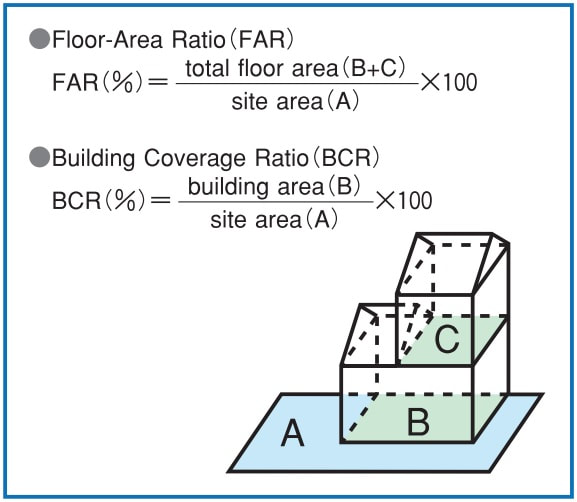

In [80]:
from IPython.display import Image
from IPython.core.display import HTML
Image(filename = "ratio.jpg", width=200, height=200)

Per avere una prima idea di come sono strutturati i dati, tramite le funzioni `head` e `tail` vengono mostrate due piccole porzioni del dataset di riferimento.

In [83]:
tokyo_data.head()

,Region,Municipality,MinTimeToNearestStation,TradePrice,Area,LandShape,Frontage,TotalFloorArea,BuildingYear,PrewarBuilding,Structure,Classification,Breadth,CoverageRatio,FloorAreaRatio,Year,Quarter
381,Commercial Area,Chiyoda Ward,3,9.090909e+05,85.0,Semi-rectangular Shaped,8.0,130.0,1960,False,RC,Ward Road,3.2,80.0,800.0,2019,1
1329,Commercial Area,Chiyoda Ward,3,2.060606e+06,100.0,Semi-square Shaped,9.0,220.0,1977,False,RC,Ward Road,6.7,80.0,800.0,2015,4
1500,Residential Area,Chiyoda Ward,3,4.606061e+05,65.0,Semi-shaped,6.6,100.0,1954,False,W,Ward Road,3.0,80.0,600.0,2018,3
1514,Commercial Area,Chiyoda Ward,2,2.545455e+05,35.0,Rectangular Shaped,3.5,60.0,1957,False,W,Ward Road,6.0,80.0,600.0,2016,3
1701,Commercial Area,Chiyoda Ward,3,4.181818e+05,90.0,Semi-rectangular Shaped,8.5,100.0,2000,False,S,Private Road,4.0,80.0,500.0,2014,4


In [85]:
tokyo_data.tail()

,Region,Municipality,MinTimeToNearestStation,TradePrice,Area,LandShape,Frontage,TotalFloorArea,BuildingYear,PrewarBuilding,Structure,Classification,Breadth,CoverageRatio,FloorAreaRatio,Year,Quarter
396334,Residential Area,Nishitokyo City,28,321212.121212,135.0,Semi-square Shaped,9.5,105.0,2014,False,W,Private Road,4.0,40.0,80.0,2013,4
396581,Residential Area,Nishitokyo City,9,381818.181818,110.0,Semi-shaped,8.8,95.0,2013,False,W,City Road,5.0,50.0,100.0,2013,4
396582,Residential Area,Nishitokyo City,7,369696.969697,110.0,Irregular Shaped,2.7,95.0,2013,False,W,City Road,5.0,50.0,100.0,2013,4
396583,Residential Area,Nishitokyo City,9,424242.424242,110.0,Rectangular Shaped,9.2,105.0,2013,False,W,City Road,5.0,50.0,100.0,2013,4
396602,Residential Area,Nishitokyo City,8,357575.757576,110.0,Irregular Shaped,2.7,95.0,2013,False,W,City Road,5.0,50.0,100.0,2013,4


Al fine di avere i record ordinati, si è deciso di reimpostare l'indice del frame.

In [88]:
tokyo_data.reset_index(drop=True, inplace=True)

In [90]:
tokyo_data

,Region,Municipality,MinTimeToNearestStation,TradePrice,Area,LandShape,Frontage,TotalFloorArea,BuildingYear,PrewarBuilding,Structure,Classification,Breadth,CoverageRatio,FloorAreaRatio,Year,Quarter
0,Commercial Area,Chiyoda Ward,3,9.090909e+05,85.0,Semi-rectangular Shaped,8.0,130.0,1960,False,RC,Ward Road,3.2,80.0,800.0,2019,1
1,Commercial Area,Chiyoda Ward,3,2.060606e+06,100.0,Semi-square Shaped,9.0,220.0,1977,False,RC,Ward Road,6.7,80.0,800.0,2015,4
2,Residential Area,Chiyoda Ward,3,4.606061e+05,65.0,Semi-shaped,6.6,100.0,1954,False,W,Ward Road,3.0,80.0,600.0,2018,3
3,Commercial Area,Chiyoda Ward,2,2.545455e+05,35.0,Rectangular Shaped,3.5,60.0,1957,False,W,Ward Road,6.0,80.0,600.0,2016,3
4,Commercial Area,Chiyoda Ward,3,4.181818e+05,90.0,Semi-rectangular Shaped,8.5,100.0,2000,False,S,Private Road,4.0,80.0,500.0,2014,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34371,Residential Area,Nishitokyo City,28,3.212121e+05,135.0,Semi-square Shaped,9.5,105.0,2014,False,W,Private Road,4.0,40.0,80.0,2013,4
34372,Residential Area,Nishitokyo City,9,3.818182e+05,110.0,Semi-shaped,8.8,95.0,2013,False,W,City Road,5.0,50.0,100.0,2013,4
34373,Residential Area,Nishitokyo City,7,3.696970e+05,110.0,Irregular Shaped,2.7,95.0,2013,False,W,City Road,5.0,50.0,100.0,2013,4
34374,Residential Area,Nishitokyo City,9,4.242424e+05,110.0,Rectangular Shaped,9.2,105.0,2013,False,W,City Road,5.0,50.0,100.0,2013,4


___
### Analisi Esplorativa

Per ricapitolare, le colonne prese in considerazione per l'addestramento del modello sono:

In [94]:
tokyo_data.columns

Index(['Region', 'Municipality', 'MinTimeToNearestStation', 'TradePrice',
       'Area', 'LandShape', 'Frontage', 'TotalFloorArea', 'BuildingYear',
       'PrewarBuilding', 'Structure', 'Classification', 'Breadth',
       'CoverageRatio', 'FloorAreaRatio', 'Year', 'Quarter'],
      dtype='object')

Inoltre, per rendere più semplice e chiara la compresione delle colonne si è deciso di cambiare nome ad alcune di esse.

In [97]:
tokyo_data.rename(
    columns={"MinTimeToNearestStation": "TimeToStation", 
             "TradePrice": "Price", 
             "Classification": "Road"}, 
    inplace=True)

Riduco il numero di cifre decimali visibili per facilitare la lettura.

In [100]:
#tokyo_data.describe().apply(lambda x: x.apply("{0:0.1f}".format))
pd.options.display.float_format = "{:.3f}".format

Il metodo `describe` fornisce un riassunto generale sulle statistiche dei valori nelle colonne di tipo numerico.

In [103]:
tokyo_data.describe()

,TimeToStation,Price,Area,Frontage,TotalFloorArea,BuildingYear,Breadth,CoverageRatio,FloorAreaRatio,Year,Quarter
count,34376.000,34376.000,34376.000,34376.000,34376.000,34376.000,34376.000,34376.000,34376.000,34376.000,34376.000
mean,13.821,285532.137,107.782,7.621,95.928,2007.751,5.319,52.524,150.228,2016.293,2.474
std,8.918,209750.757,58.519,3.686,39.357,14.533,2.641,10.728,79.034,1.594,1.102
min,0.000,606.061,30.000,0.900,15.000,1945.000,1.000,30.000,50.000,2013.000,1.000
25%,8.000,193939.394,75.000,5.100,85.000,2003.000,4.000,40.000,80.000,2015.000,2.000
50%,12.000,260606.061,100.000,7.300,95.000,2015.000,5.000,50.000,100.000,2016.000,2.000
75%,18.000,333333.333,125.000,9.600,100.000,2017.000,6.000,60.000,200.000,2018.000,3.000
max,120.000,15151515.152,2000.000,50.000,2000.000,2020.000,60.000,80.000,1000.000,2019.000,4.000


Osservando la tabella si possono notare valori molto elevati nella sezione `TotalFloorArea`. Valori superiori a 400${m}^2$ per una casa sono molto rari (secondo stime recenti, in media le case giapponesi presenti a Tokyo hanno una metratura pari a 70${m}^2$, anche se questo non include piccole villette o abitazioni private). Prendendo in considerazione misure generali, si vanno a eliminare i valori limiti che potrebbe essere fuorvianti per il modello e in questa situazione sono considerati anomali. Il filtro è stato costruito sulla base di due campi: `Area` e `TotalFloorArea` e si è fatto in modo che l'area presa in considerazione non sia superiore all'area totale.

In [106]:
tokyo_data.drop(tokyo_data[(tokyo_data["Area"] > 300) | (tokyo_data["TotalFloorArea"] > 400)].index, inplace=True)
tokyo_data.describe()

,TimeToStation,Price,Area,Frontage,TotalFloorArea,BuildingYear,Breadth,CoverageRatio,FloorAreaRatio,Year,Quarter
count,34032.000,34032.000,34032.000,34032.000,34032.000,34032.000,34032.000,34032.000,34032.000,34032.000,34032.000
mean,13.826,278109.248,104.344,7.519,94.389,2007.999,5.310,52.529,150.247,2016.292,2.473
std,8.867,150721.232,40.722,3.474,24.040,14.308,2.621,10.724,78.872,1.594,1.101
min,0.000,606.061,30.000,0.900,15.000,1945.000,1.000,30.000,50.000,2013.000,1.000
25%,8.000,193939.394,75.000,5.000,85.000,2004.000,4.000,40.000,80.000,2015.000,2.000
50%,12.000,254545.455,100.000,7.200,95.000,2015.000,5.000,50.000,100.000,2016.000,2.000
75%,18.000,333333.333,120.000,9.500,100.000,2017.000,6.000,60.000,200.000,2018.000,3.000
max,120.000,4363636.364,300.000,50.000,390.000,2020.000,60.000,80.000,1000.000,2019.000,4.000


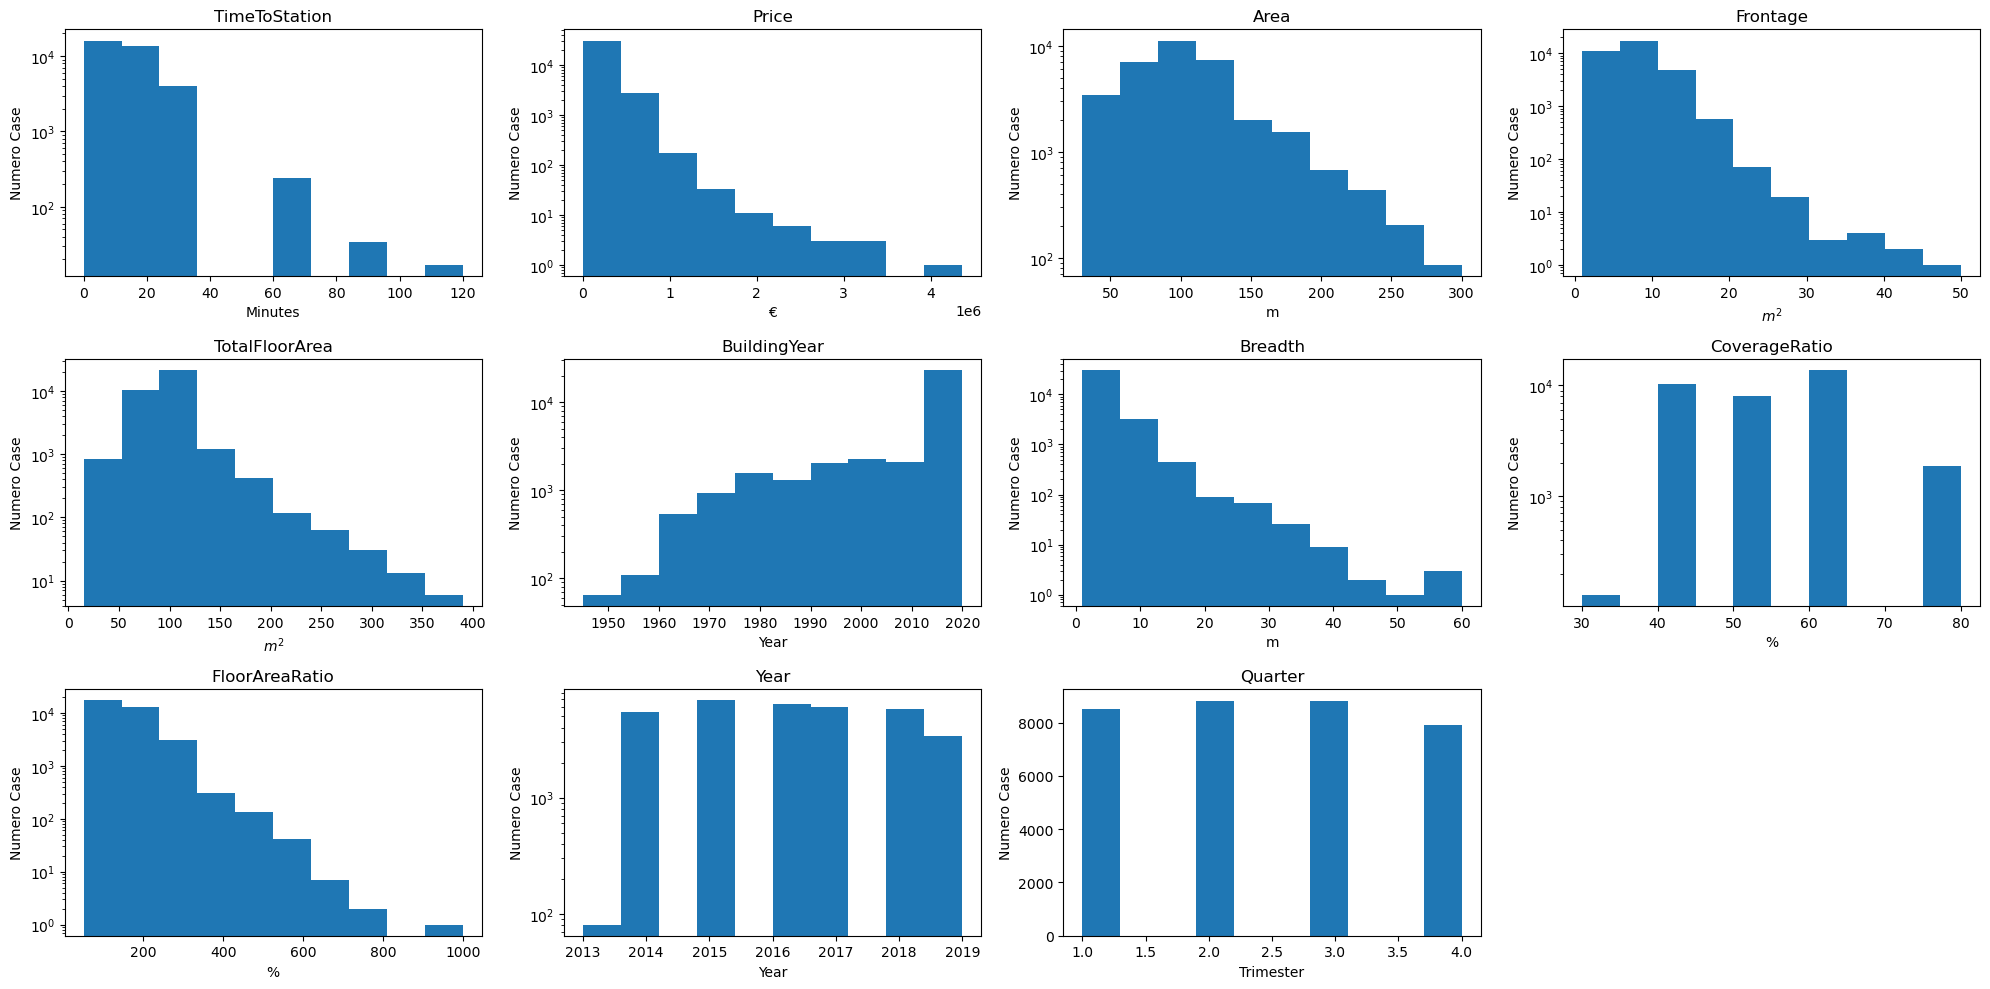

In [108]:
plt.figure(figsize=(20, 10))
x_title = ["Minutes", "€", "m", "${m}^2$", "${m}^2$", "Year", "m", "%", "%", "Year", "Trimester"]

for index, columns in enumerate(tokyo_data.select_dtypes(include=["number"]), start=1):  # tokyo_data.describe().columns[:6]
    plt.subplot(3, 4, index)
    plt.title(columns)
    if (index not in [11]):
        plt.yscale("log")
    plt.ylabel("Numero Case")
    plt.xlabel(x_title[index - 1])
    plt.hist(tokyo_data[columns])

plt.tight_layout()
plt.show();

Dai grafici ricavati si può notare come, nel caso di `FloorAreaRatio`, siano presenti numerosi valori anomali. Una casa con una superficie calpestabile maggiore di 3 volte quella dell'appezzamento di terreno in cui è presente l'immobile, è raro. Bisogna tenere in considerazione che in una città come Tokyo le abitazioni generalmente sono appartamenti o villette (con uno o due piani) e i terreni assegnati ad un'immobile non sono immensi, visto la numerosità di persone presenti. Quindi, si tiene necessario filtrare il frame ulteriormente sul campo `FloorAreaRatio` in modo da avere come limite massimo 300, quindi 3 volte superiore alla superficie della terra.   
Un'altro campo da osservare è il `Frontage`, la lunghezza del terreno che si affaccia sulla strada. Sono presenti valori molto elevati e che possono fare riferimento a casi particolari o molto specifici (nel dataset sono presenti alcuni casi riguardo questa situazione) e perciò ne verranno eliminati i record relativi.

In [111]:
tokyo_data.drop(tokyo_data[(tokyo_data["FloorAreaRatio"] > 300) | (tokyo_data["Frontage"] > 30)].index, inplace=True)

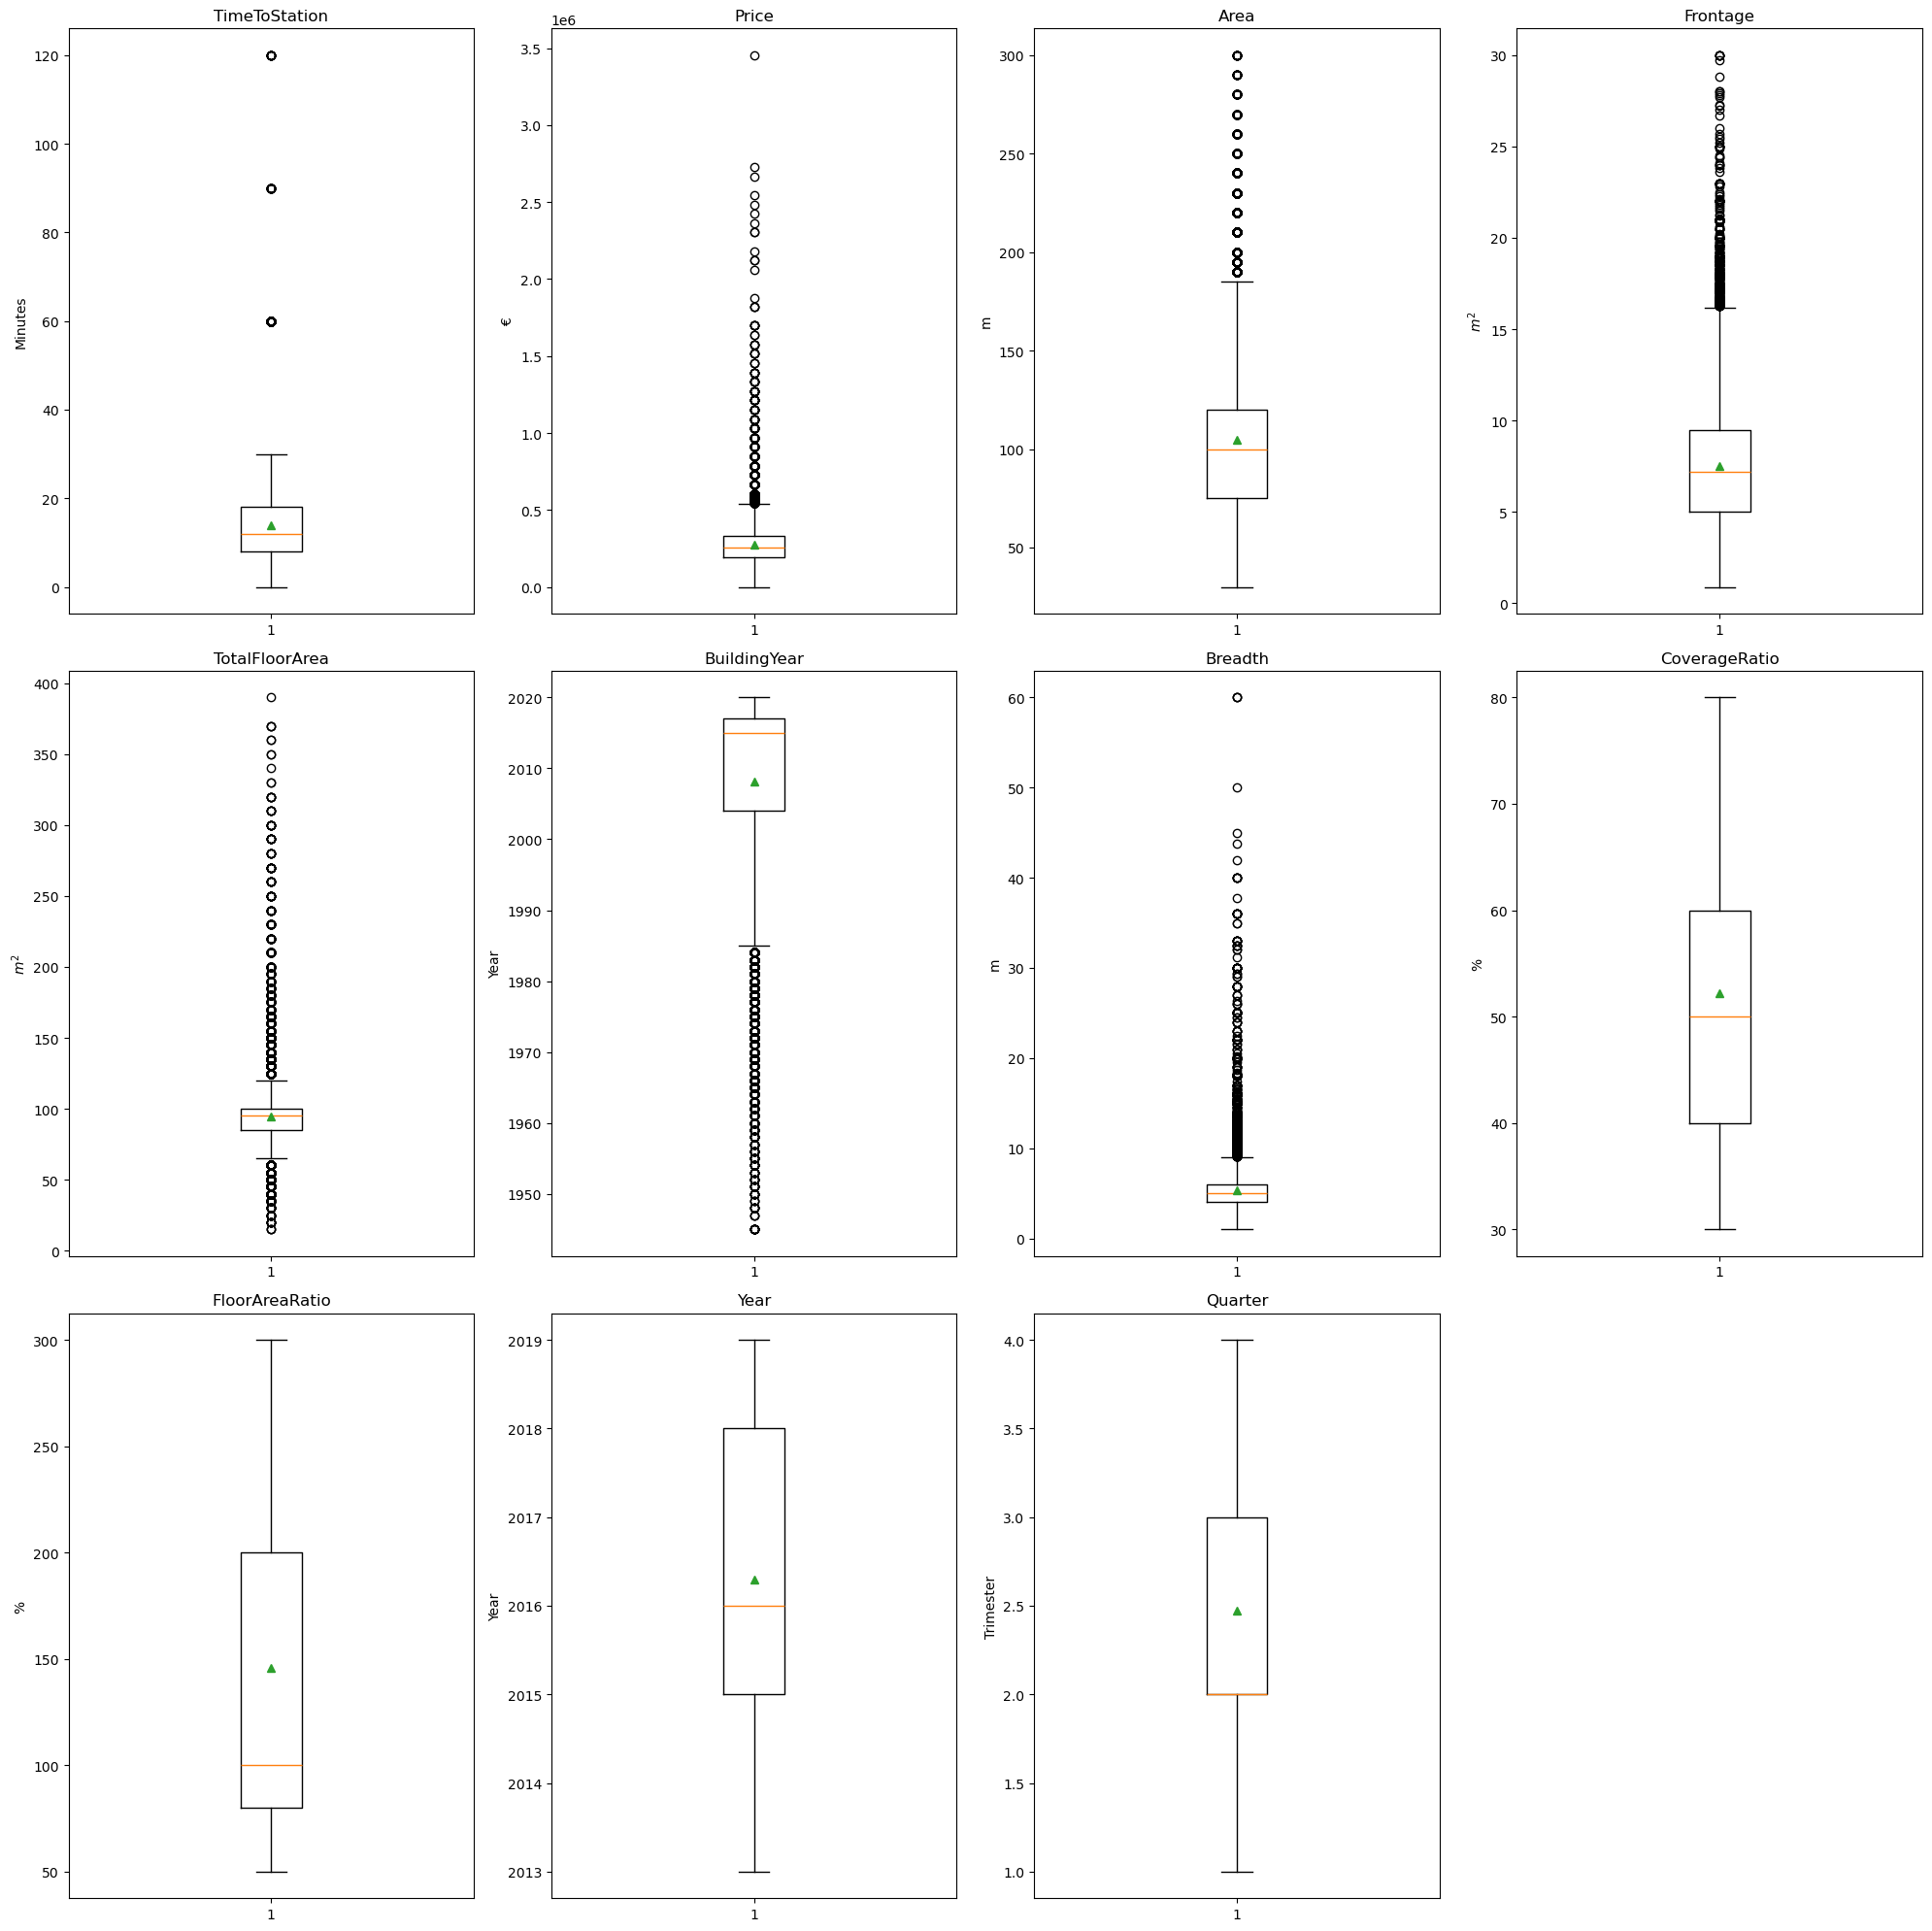

In [113]:
plt.figure(figsize=(20, 20))
y_title = ["Minutes", "€", "m", "${m}^2$", "${m}^2$", "Year", "m", "%", "%", "Year", "Trimester"]

for index, columns in enumerate(tokyo_data.select_dtypes(include=["number"]), start=1):
    plt.subplot(3, 4, index)
    plt.title(columns)
    plt.ylabel(y_title[index - 1])
    plt.boxplot(tokyo_data[columns], showmeans=True)

plt.tight_layout()
plt.show();

Tramite questi grafici si può notare come alcuni campi abbiano numerosi valori fuori dalla norma, cioè i cosidetti **outliers**. In questa situazione tali valori vengono mantenuti dato che si trovano all'interno di range considerati validi ai fini dell'analisi.

Infine, vengono mostrati i valori presenti nel campo `PrewarBuilding`.

In [118]:
tokyo_data["PrewarBuilding"].value_counts()

PrewarBuilding
False    33519
True        15
Name: count, dtype: int64

#### Esplorazione delle variabili categoriche

Per iniziare, è possibile analizzare il numero di valori unici presenti in ciascuna colonna categorica.

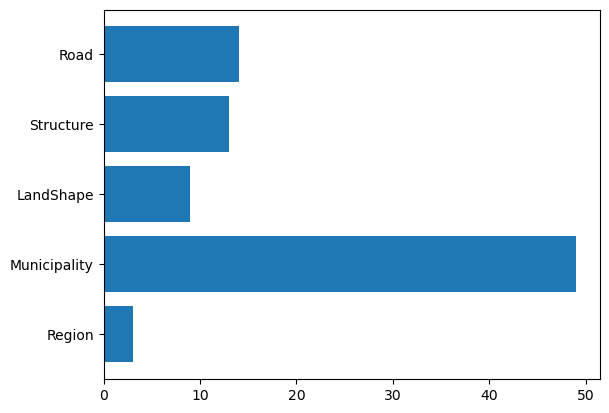

In [122]:
#categories = ["Region", "Municipality", "LandShape", "Structure", "Road"]
categories = tokyo_data.select_dtypes(include=["category"])
plt.barh(tokyo_data[categories.columns].columns, tokyo_data[categories.columns].nunique())
plt.show()

In [124]:
print("Valori unici: ")
for categorical in categories:
    unique_values = tokyo_data[categorical].nunique()
    print(f"- {categorical} -> {unique_values}")

Valori unici: 
- Region -> 3
- Municipality -> 49
- LandShape -> 9
- Structure -> 13
- Road -> 14


La colonna `Municipality` presenta una grande quantità di valori unici.

In seguito si è deciso di analizzare il campo `Municipality` per comprendere come sono suddivisi i dati. Il grafico mostra i vari quartieri e distretti nella città di Tokyo e i principali vengono a trovarsi in aree più *periferiche* rispetto al centro della città.

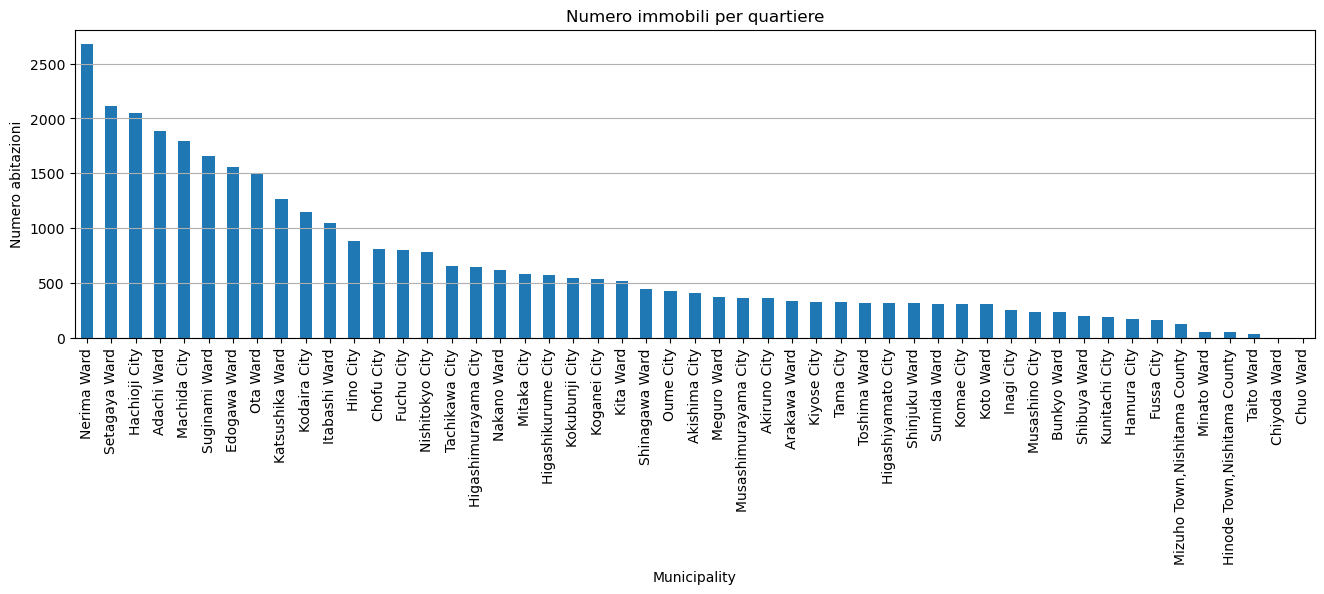

In [128]:
tokyo_data["Municipality"].value_counts().plot.bar(figsize=(16,4))
plt.grid(axis="y")
plt.title("Numero immobili per quartiere")
plt.ylabel("Numero abitazioni")
plt.show()

___
La maggior parte delle abitazioni presenti hanno forma **Rettangolare** e **Semi-rettangolare**.

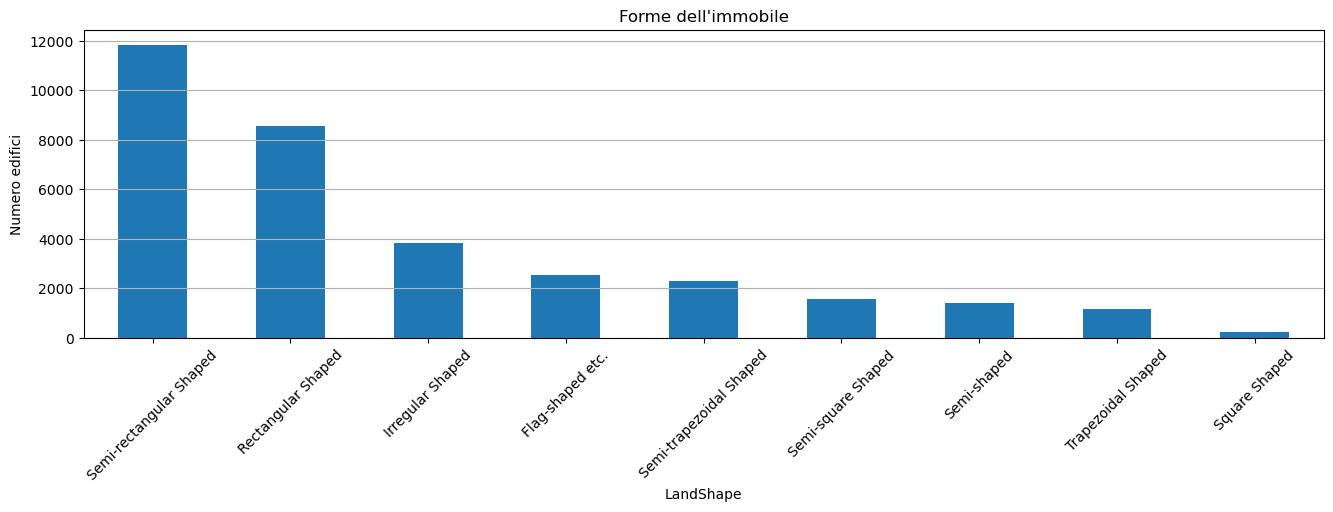

In [131]:
tokyo_data["LandShape"].value_counts().plot.bar(figsize=(16,4))
plt.grid(axis="y")
plt.title("Forme dell'immobile")
plt.ylabel("Numero edifici")
plt.xticks(rotation=45)
plt.show()

___
I materiali favoriti per la costruzione delle case sono il **legno** (in netta maggioranza) e **l'acciaio**.

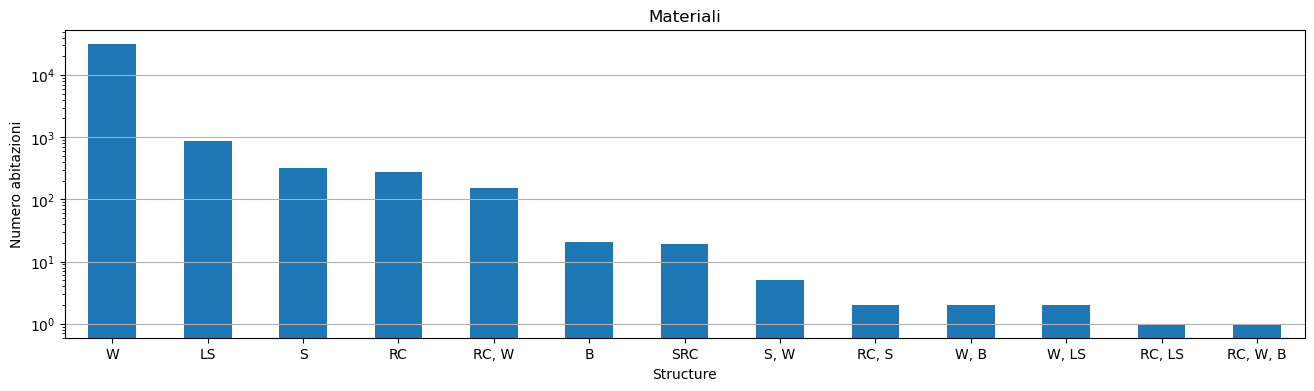

In [134]:
tokyo_data["Structure"].value_counts().plot.bar(figsize=(16,4))
plt.grid(axis="y")
plt.yscale("log")
plt.title("Materiali")
plt.ylabel("Numero abitazioni")
plt.xticks(rotation=0)
plt.show()

Vengono mostrati i significati delle sigle presenti, ottenibili direttamente dal sito di riferimento per il dataset:
* **SRC** = Steel frame reinforced concrete;
* **RC** = Reinforced concrete;
* **S** = Steel frame; 
* **LS** = Light steel structure;
* **B** = Concrete block;
* **W** = Wooden.

In seguito, si è deciso di mostrare l'andamento delle case in legno al variare degli anni e si può notare come il loro numero incrementi negli ultimi anni delle osservazioni effettuate.

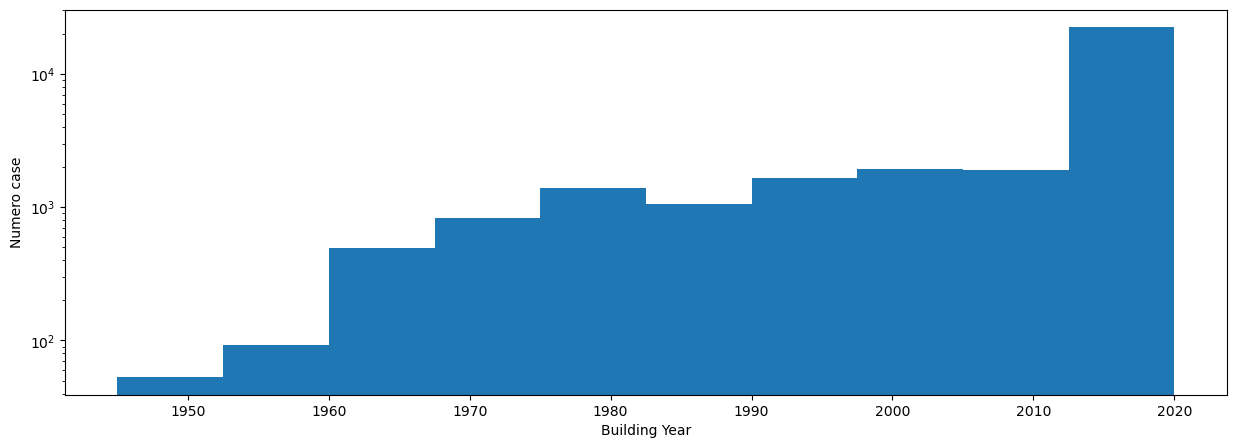

In [139]:
structure_by_year = tokyo_data.loc[tokyo_data["Structure"] == "W"].groupby("BuildingYear")["Structure"]

plt.figure(figsize=(15,5))
plt.hist(x=structure_by_year.groups.keys(), weights=structure_by_year.count())
plt.yscale("log")
plt.xlabel("Building Year")
plt.ylabel("Numero case")
plt.show()

___
Infine, si è deciso di controllare la distribuzione della variabile `Region` per capire in quale ambiente sono state costruite le case prese in osservazione e tramite un'indagine sul grafico si nota la grande abbondanza di edifici in **zone residenziali**.

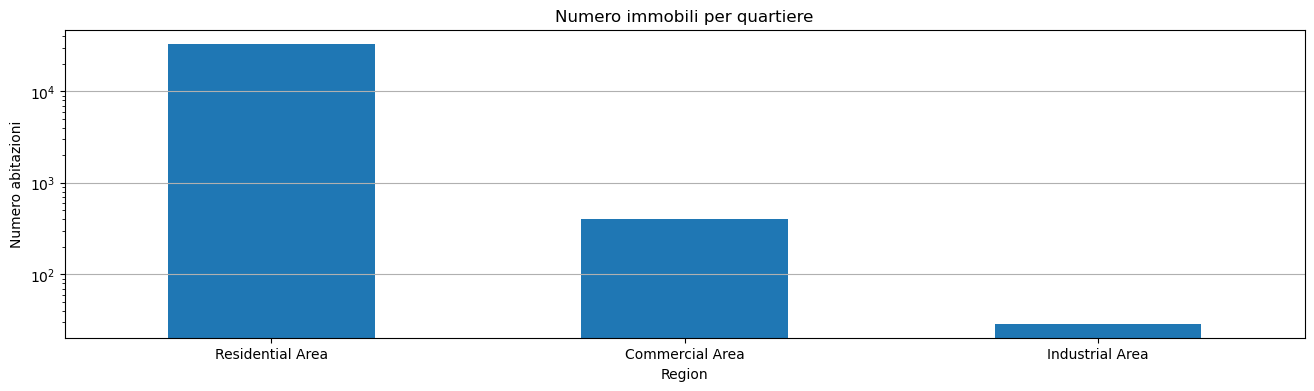

In [142]:
tokyo_data["Region"].value_counts().plot.bar(figsize=(16,4))
plt.grid(axis="y")
plt.yscale("log")
plt.title("Numero immobili per quartiere")
plt.ylabel("Numero abitazioni")
plt.xticks(rotation=0)
plt.show()

#### Dipendenza tra variabili

In questa sezione si prova a controllare la presenza di dipendenze tra le variabili in gioco che, nel caso, possono compromettere il corretto funzionamento del modello predittivo, rendendolo instabile. Per valutare questa situazione si utilizza la funzione `corr()` che definisce una correlazione tra le variabili numeriche. In genere si fa riferimento alla **correlazione di Pearson** che esprime una relazione di linearità tra le variabili presenti.

In [146]:
# tokyo_data.describe().columns indica le colonne che sono rappresentate dalla funzione describe()
# (include solo le variabili di tipo numerico)
tokyo_corr = tokyo_data[tokyo_data.describe().columns].corr()
tokyo_corr

,TimeToStation,Price,Area,Frontage,TotalFloorArea,BuildingYear,Breadth,CoverageRatio,FloorAreaRatio,Year,Quarter
TimeToStation,1.000,-0.286,0.271,0.171,0.012,0.047,0.082,-0.299,-0.279,0.007,-0.000
Price,-0.286,1.000,0.159,0.067,0.479,0.184,-0.008,0.095,0.050,0.067,-0.010
Area,0.271,0.159,1.000,0.475,0.563,-0.112,0.089,-0.475,-0.471,-0.005,-0.005
Frontage,0.171,0.067,0.475,1.000,0.302,-0.140,0.075,-0.268,-0.259,0.007,-0.004
TotalFloorArea,0.012,0.479,0.563,0.302,1.000,0.020,0.111,-0.015,-0.034,-0.009,-0.006
BuildingYear,0.047,0.184,-0.112,-0.140,0.020,1.000,0.069,-0.036,-0.050,0.060,-0.006
Breadth,0.082,-0.008,0.089,0.075,0.111,0.069,1.000,0.063,0.063,-0.003,-0.007
CoverageRatio,-0.299,0.095,-0.475,-0.268,-0.015,-0.036,0.063,1.000,0.855,-0.007,0.002
FloorAreaRatio,-0.279,0.050,-0.471,-0.259,-0.034,-0.050,0.063,0.855,1.000,-0.013,0.006
Year,0.007,0.067,-0.005,0.007,-0.009,0.060,-0.003,-0.007,-0.013,1.000,-0.193


Per avere una visone più semplice e comprensiva si è fatto affidamento ad una libreria di Python che si occupa di *data visualization*: **Seaborn**.

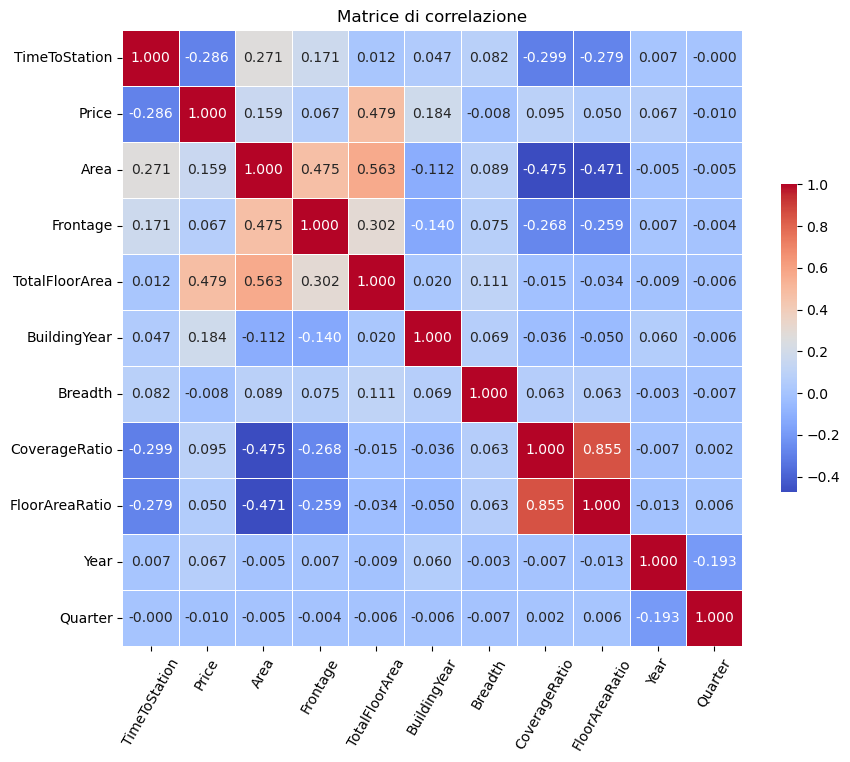

In [149]:
# Si importa la libreria e le si assegna un alias
import seaborn as sns

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(tokyo_corr,
           annot=True,
           ax=ax,
           cmap="coolwarm",
           fmt=".3f",
           linewidths=0.5,
           cbar_kws={"shrink": .5})

plt.xticks(rotation=60)
plt.yticks(rotation=0)
plt.title("Matrice di correlazione")
plt.show()

In questa matrice di correlazione, più la cella tende al rosso e maggiore è la correlazione tra le variabili in gioco. `Coverageratio` e `FloorAreaRatio` hanno una elevata collinearità (quasi perfetta). Anche le coppie (`Area`, `Frontage`), (`Area`, `TotalFloorArea`), (`Area`, `CoverageRatio`) e (`Area`, `FloorAreaRatio`) hanno un buon legame, di cui diretto per le prime due coppie e inverso per le restanti. Questa situazione può portare il modello ad essere più instabile, rendendo più difficile capire il contributo di ciascuna variabile indipendente sulla variabile dipendente.

In seguito è stato rappresentato un grafico di tipo *scatter* per osservare la correlazione tra `TotalFloorArea` e `Price`. In genere, il prezzo aumenta all'aumentare della superficie del pavimento.

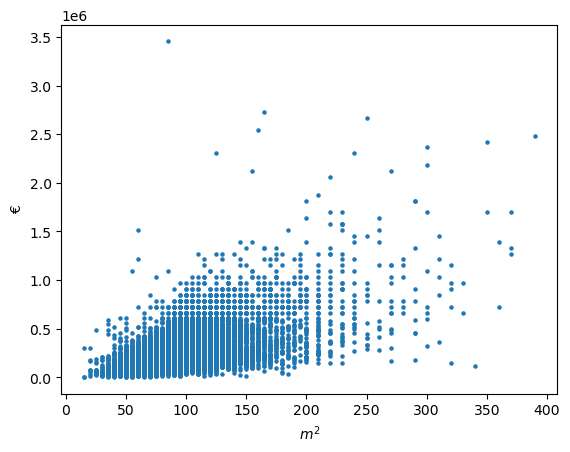

In [155]:
plt.scatter(tokyo_data["TotalFloorArea"], tokyo_data["Price"], s=5)
plt.xlabel("${m}^2$")
plt.ylabel("€")
plt.show()

### Preparazione Dati

L'obiettivo del modello è prevedere il valore di mercato di un'immobile e per questo motivo si estraggono i valori della variabile dipendente, `Price`.

In [160]:
Y = tokyo_data["Price"]
X = tokyo_data.drop(columns=["Price"])

Adesso risulta necessario suddividere i dati in *training set* e *validation set*. In questa prima parte si decide si utilizzare il modello **hold-out**, cioè effettuando una singola suddivisione delle osservazioni disponibili sul dataset di partenza. Quindi, si importa `sklearn`, libreria di algoritmi di machine learning e si importa da quest'ultima il modulo `train_test_split` per suddividere i dati.

In [163]:
import sklearn
from sklearn.model_selection import train_test_split

Il *validation set* conterrà il 40% dei dati iniziali.

In [166]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [168]:
# Funzione per stampare a video i valori delle diverse metriche di valutazione
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def show_metrics(X, Y, tokyo_model, RMSPE=False):
    output_prediction = tokyo_model.predict(X)
    mse = mean_squared_error(Y, output_prediction)
    relative_error = np.mean(np.abs(Y - output_prediction) / Y)
    #r2_model = tokyo_model.score(X, Y)
    r2_score_metrics = r2_score(Y, output_prediction)
    rmspe = np.sqrt(np.mean((tokyo_model.predict(X_test) /Y_test - 1) ** 2))
    
    print("Valori delle metriche:")
    #print(f"1) R-squared coefficient model: {r2_model:.10}")
    print(f"1) Mean squared error: {mse:.10}")
    print(f"2) Relative error: {relative_error:.10%}")
    print(f"3) R-squared coefficient: {r2_score_metrics:.10}")
    if (RMSPE):
        print(f"4) RMSPE: {rmspe:.10}")

Vengono create delle liste sulla base del tipo di variabile che rappresentano, faciliteranno le scelta sulle trasformazioni delle colonne.

In [171]:
numeric_columns = ["TimeToStation", "Area", "Frontage", "TotalFloorArea", "BuildingYear", "Breadth", "CoverageRatio", "FloorAreaRatio", "Year", "Quarter"]
boolean_columns = ["PrewarBuilding"]
categorical_columns = ["Region", "Municipality", "LandShape", "Structure", "Road"]

In [173]:
# Funzione che mi restituisce una Serie per analizzare l'importanza di ciascuna feature
def feature_importance(model, named_step, number=10, ascending=False):
    feature_names = model["preprocessing"].get_feature_names_out()
    return pd.Series(model.named_steps[named_step].coef_, feature_names).sort_values(ascending=ascending).head(number)

### Modelli

Il primo esempio di modello che viene preso in cosiderazione è quello lineare, permette di avere una prima idea sul suo funzionamento. Siccome i dati a disposizione sono presenti in diverse tipologie: *Numeriche*, *Categoriche* e *Booleane*, per effettuare un prepocessing differenziato sulle colonne, e quindi applicare correttamente i filtri, si importa un filtro composito detto `ColumnTransformer`. Inoltre, alle variabili categoriche viene applicato un filtro `OneHotEncoder` per convertirle in un formato numerico (N variabili binarie). Infine, per raggruppare tutti i filtri viene utilizzata una `Pipeline` che li applica automaticamente.

In [176]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [178]:
transformer = ColumnTransformer([
    ("numeric", "passthrough", numeric_columns),
    ("categorical", OneHotEncoder(handle_unknown="infrequent_if_exist"), categorical_columns),
    ("boolean", "passthrough", boolean_columns)
])

tokyo_model = Pipeline([
    ("preprocessing", transformer),
    ("linear", LinearRegression())
])

tokyo_model.fit(X_train, Y_train)
tokyo_model.score(X_train, Y_train)

0.6980099394382848

In [180]:
show_metrics(X_test, Y_test, tokyo_model)

Valori delle metriche:
1) Mean squared error: 6.698846752e+09
2) Relative error: 25.5696154671%
3) R-squared coefficient: 0.6941320809


In [182]:
show_metrics(X_train, Y_train, tokyo_model)

Valori delle metriche:
1) Mean squared error: 6.136032406e+09
2) Relative error: 22.5682599904%
3) R-squared coefficient: 0.6980099394


Analizzando i risultati ottenuti dalle metriche prese in considerazione si evince che il modello si comporta in maniera simile anche sul *validation set*, quindi generalizza piuttosto bene sui dati. Andiamo a controllare le feature più influenti per il modello lineare.

In [185]:
feature_names = tokyo_model["preprocessing"].get_feature_names_out()
pd.Series(tokyo_model.named_steps["linear"].coef_, feature_names).sort_values(ascending=False).head(10)
#for i, value in enumerate(tokyo_model.named_steps["ridge"].coef_):
#    print("Feature %s = %.5f" % (feature_names[i], value))

categorical__Municipality_Minato Ward      370465.090
categorical__Municipality_Shibuya Ward     302331.854
categorical__Municipality_Meguro Ward      235417.521
categorical__Municipality_Bunkyo Ward      195025.503
categorical__Municipality_Musashino City   159660.404
categorical__Municipality_Shinjuku Ward    148997.475
categorical__Municipality_Setagaya Ward    142741.656
categorical__Municipality_Shinagawa Ward   137559.624
categorical__Municipality_Taito Ward       103488.665
categorical__Municipality_Suginami Ward    103356.618
dtype: float64

Le feature più impattanti per il modello fanno parte del campo `Municipality`, quindi viene data molta importanza alla zona in cui si trova l'abitazione. Questi risultati sono da considerarsi realistici perchè un quartiere o una determinata zona di una città hanno un elevato impatto sul prezzo di un'immobile. D'altro canto si possono osservare coefficienti molto elevati e per questo si può provare a standardizzare i dati presenti siccome potrebbero essere su scale molto differenti.

#### Standardizzazione

Come filtro per standardizzare i dati si è deciso di applicare `StandardScaler`.

In [190]:
from sklearn.preprocessing import StandardScaler

In [192]:
transformer = ColumnTransformer([
    ("numeric", "passthrough", numeric_columns),
    ("categorical", OneHotEncoder(sparse_output=False, handle_unknown="infrequent_if_exist"), categorical_columns),
    ("boolean", "passthrough", boolean_columns)
])

tokyo_model = Pipeline([
    ("preprocessing", transformer),
    ("scaler", StandardScaler(with_mean=False)),
    ("linear", LinearRegression())
])

tokyo_model.fit(X_train, Y_train)
tokyo_model.score(X_train, Y_train)

0.6980366553898393

In [194]:
show_metrics(X_test, Y_test, tokyo_model)

Valori delle metriche:
1) Mean squared error: 6.698335469e+09
2) Relative error: 25.5697283834%
3) R-squared coefficient: 0.694155426


In [196]:
show_metrics(X_train, Y_train, tokyo_model)

Valori delle metriche:
1) Mean squared error: 6.135489574e+09
2) Relative error: 22.5584317174%
3) R-squared coefficient: 0.6980366554


In [198]:
feature_names = tokyo_model["preprocessing"].get_feature_names_out()
pd.Series(tokyo_model.named_steps["linear"].coef_, feature_names).sort_values(ascending=False).head(10)

numeric__Area                              46941.511
numeric__BuildingYear                      41907.999
numeric__TotalFloorArea                    37939.640
categorical__Municipality_Setagaya Ward    36476.002
categorical__Municipality_Meguro Ward      26392.873
categorical__Municipality_Suginami Ward    23452.667
categorical__Municipality_Shibuya Ward     22591.067
categorical__Municipality_Bunkyo Ward      17016.811
categorical__Municipality_Shinagawa Ward   16077.511
categorical__Municipality_Minato Ward      15910.729
dtype: float64

Da come si può vedere, la standardizzazione ha ridotto notevolmente i coefficienti delle feature. Inoltre, in questo caso le feature più importanti sono cambiate, infatti abbiamo: `Area`, `BuildingYear` e `TotalFloorArea` oltre ai numerosi campi di `Municipality`. Queste nuove caratteristiche che risaltano hanno un riscontro realistico, in quanto possono incidere molto sul prezzo finale di un'abitazione.

#### Regolarizzazione

Per ridurre ulteriormente i valori dei coefficienti, ancora molto elevati, è possibile applicare la regolarizzazione, una *penalità* ai valori estremi che rappresentano i parametri del modello. Inoltre, si cerca di rendere il modello più capace a generalizzare, migliorando le prestazioni su dati che non sono stati passati nella fase di training. Nel primo caso, viene applicata la regolarizzazione di **tipo L2** introducendo il modello `Ridge` che tenta di ridurre i valori dei coefficienti in modo che alcune caratteristiche non vadano a dominare sulle restanti.

##### Ridge

In [205]:
from sklearn.linear_model import Ridge

In [207]:
%%time

transformer = ColumnTransformer([
    ("numeric", "passthrough", numeric_columns),
    ("categorical", OneHotEncoder(sparse_output=False, handle_unknown="infrequent_if_exist"), categorical_columns),
    ("boolean", "passthrough", boolean_columns)
])

tokyo_model = Pipeline([
    ("preprocessing", transformer),
    ("scaler", StandardScaler(with_mean=False)),
    ("ridge", Ridge(alpha=10))
])

tokyo_model.fit(X_train, Y_train)
tokyo_model.score(X_train, Y_train)

CPU times: total: 438 ms
Wall time: 115 ms


0.6980362624804524

In [209]:
show_metrics(X_test, Y_test, tokyo_model)

Valori delle metriche:
1) Mean squared error: 6.698577083e+09
2) Relative error: 25.5543392125%
3) R-squared coefficient: 0.694144394


In [211]:
show_metrics(X_train, Y_train, tokyo_model)

Valori delle metriche:
1) Mean squared error: 6.135497557e+09
2) Relative error: 22.5477963514%
3) R-squared coefficient: 0.6980362625


In [213]:
feature_names = tokyo_model["preprocessing"].get_feature_names_out()
pd.Series(tokyo_model.named_steps["ridge"].coef_, feature_names).sort_values(ascending=False).head(10)

numeric__Area                              46845.079
numeric__BuildingYear                      41866.742
numeric__TotalFloorArea                    37965.764
categorical__Municipality_Setagaya Ward    36438.700
categorical__Municipality_Meguro Ward      26368.822
categorical__Municipality_Suginami Ward    23427.268
categorical__Municipality_Shibuya Ward     22569.995
categorical__Municipality_Bunkyo Ward      16996.500
categorical__Municipality_Shinagawa Ward   16054.771
categorical__Municipality_Minato Ward      15894.892
dtype: float64

La regressione L2 ha portato piccolissimi miglioramenti nelle prestazioni e nei valori. In seguito, viene provata anche la regressione di tipo L1, la quale permette di ignorare le variabili considerate meno rilevanti al fine di semplificare il modello. Inoltre, si occupa di risolvere il problema della multicollinearità, presente tra alcune variabili. A tal fine si importa il modello `Lasso`.

In [216]:
# Per comprendere quanto può influire Lasso.
ridge_zero = (tokyo_model.named_steps["ridge"].coef_ == 0).sum()

##### Lasso

In [219]:
from sklearn.linear_model import Lasso

In [221]:
%%time

transformer = ColumnTransformer([
    ("numeric", "passthrough", numeric_columns),
    ("categorical", OneHotEncoder(sparse_output=False, handle_unknown="infrequent_if_exist"), categorical_columns),
    ("boolean", "passthrough", boolean_columns)
])

tokyo_model = Pipeline([
    ("preprocessing", transformer),
    ("scaler", StandardScaler(with_mean=False)),
    ("lasso", Lasso(alpha=1, max_iter=100_000)) # Serve per garantire la convergenza
])

tokyo_model.fit(X_train, Y_train)
tokyo_model.score(X_train, Y_train)

CPU times: total: 3min 45s
Wall time: 28.3 s


0.6980366478413813

In [223]:
show_metrics(X_test, Y_test, tokyo_model)

Valori delle metriche:
1) Mean squared error: 6.698535069e+09
2) Relative error: 25.5683595717%
3) R-squared coefficient: 0.6941463123


In [225]:
show_metrics(X_train, Y_train, tokyo_model)

Valori delle metriche:
1) Mean squared error: 6.135489727e+09
2) Relative error: 22.5573998073%
3) R-squared coefficient: 0.6980366478


In [227]:
feature_names = tokyo_model["preprocessing"].get_feature_names_out()
pd.Series(tokyo_model.named_steps["lasso"].coef_, feature_names).sort_values(ascending=False).head(10)

numeric__Area                              46935.308
numeric__BuildingYear                      41905.194
categorical__Municipality_Setagaya Ward    39996.338
numeric__TotalFloorArea                    37942.415
categorical__Municipality_Meguro Ward      27961.216
categorical__Municipality_Suginami Ward    26528.609
categorical__Municipality_Shibuya Ward     23643.857
categorical__Municipality_Ota Ward         18751.854
categorical__Municipality_Bunkyo Ward      18230.067
categorical__Municipality_Shinagawa Ward   17685.971
dtype: float64

In [229]:
print("Valori nulli con modello Ridge: ", ridge_zero)
print("Valori nulli con modello Lasso: ", (tokyo_model.named_steps["lasso"].coef_ == 0).sum())

Valori nulli con modello Ridge:  0
Valori nulli con modello Lasso:  5


In seguito vengono mostrate le variabili che sono state annullate dal modello e considerate irrilevanti ai fini dell'addestramento.

In [232]:
lasso_feature = pd.Series(tokyo_model.named_steps["lasso"].coef_, feature_names)
lasso_feature[lasso_feature == 0]

categorical__Region_Commercial Area         -0.000
categorical__Municipality_Nishitokyo City    0.000
categorical__LandShape_Semi-square Shaped   -0.000
categorical__Structure_S                     0.000
categorical__Road_City Road                  0.000
dtype: float64

Da quello che si può notare il modello Lasso è vantaggioso, se converge, perchè: 
1) anche se non riduce i valori dei coefficienti, ne annulla 5 e questo semplifica il modello;
2) ha prestazioni molto simili al modello Ridge;   

Unico svantaggio è che l'allenamento risulta più lento rispetto alla versione con regolarizzazione L2, nel caso in cui si tenti di raggiungere la convergenza.

#### Modello polinomiale

Il modello lineare, precedentemente definito, è stato in grado di generalizzare piuttosto bene sui dati in ingresso. Per rendere il modello più complesso è stato importato un filtro, `PolynomialFeatures`, così che diventi polinomiale.

In [237]:
from sklearn.preprocessing import PolynomialFeatures

In [239]:
%%time

transformer = ColumnTransformer([
    ("numeric", PolynomialFeatures(degree=2, interaction_only=False, include_bias=False), numeric_columns),
    ("categorical", OneHotEncoder(sparse_output=False, handle_unknown="infrequent_if_exist"), categorical_columns),
    ("boolean", "passthrough", boolean_columns)
])
    
tokyo_model = Pipeline([
    ("preprocessing", transformer),
    ("scaler", StandardScaler(with_mean=False)),
    ("ridge" , Ridge(alpha=10))
])

tokyo_model.fit(X_train, Y_train)
tokyo_model.score(X_train, Y_train)

CPU times: total: 703 ms
Wall time: 164 ms


0.7305373249019694

In [241]:
show_metrics(X_test, Y_test, tokyo_model)

Valori delle metriche:
1) Mean squared error: 6.008225147e+09
2) Relative error: 22.6664653344%
3) R-squared coefficient: 0.7256657166


In [243]:
show_metrics(X_train, Y_train, tokyo_model)

Valori delle metriche:
1) Mean squared error: 5.475119623e+09
2) Relative error: 20.7120771926%
3) R-squared coefficient: 0.7305373249


I risultati mostrato un miglioramento delle prestazioni del modello con l'introduzione del filtro polinomiale. Questo è dato dal fatto che si è reso il modello più complesso per adattarsi ai dati di training. Inoltre, il modello si adatta piuttosto bene sulle nuove osservazioni, anche se i dati di training vengono meglio espressi.

___
### Alberi

A differenza dei modelli di regressioni precedenti, gli alberi rappresentano un'approccio differente. Le decisioni vengono prese su una sola variabile che permette di creare rami diversi dell'albero ogni volta. Per capire le potenzialità degli alberi decisionali, è stata creata una `Pipeline` contenente un nuovo oggetto: `DecisionTreeRegressor`.

In [247]:
from sklearn.tree import DecisionTreeRegressor

Gli iperparametri passati al `DecisionTreeRegressor` sono: 
* `max_depth`, la profondità dell'albero; 
* `random_state`, determina la casualità dell'estimatore.

In [250]:
%%time

transformer = ColumnTransformer([
    ("numeric", "passthrough", numeric_columns),
    ("categorical", OneHotEncoder(sparse_output=False, handle_unknown="infrequent_if_exist"), categorical_columns),
    ("boolean", "passthrough", boolean_columns)
])

tokyo_model = Pipeline([
    ("preprocessing", transformer),
    ("scaler", StandardScaler(with_mean=False)),
    ("decision_tree", DecisionTreeRegressor(max_depth=None, random_state=42))
])

tokyo_model.fit(X_train, Y_train)
tokyo_model.score(X_train, Y_train)

CPU times: total: 375 ms
Wall time: 361 ms


0.9999804131032762

Per vedere il numero di foglie dell'albero si esegue il metodo `get_n_leaves`.

In [255]:
tokyo_model.named_steps["decision_tree"].get_n_leaves()

17978

Al fine di ispezionare l'albero viene fornita una rappresentazione testuale tramite `export_text`.

In [258]:
from sklearn.tree import export_text

In [260]:
print(export_text(tokyo_model.named_steps["decision_tree"], max_depth=3, 
                  feature_names=tokyo_model["preprocessing"].get_feature_names_out()))

|--- numeric__TotalFloorArea <= 6.07
|   |--- categorical__Municipality_Setagaya Ward <= 2.04
|   |   |--- numeric__BuildingYear <= 141.69
|   |   |   |--- numeric__TotalFloorArea <= 4.15
|   |   |   |   |--- truncated branch of depth 42
|   |   |   |--- numeric__TotalFloorArea >  4.15
|   |   |   |   |--- truncated branch of depth 32
|   |   |--- numeric__BuildingYear >  141.69
|   |   |   |--- numeric__TimeToStation <= 1.63
|   |   |   |   |--- truncated branch of depth 64
|   |   |   |--- numeric__TimeToStation >  1.63
|   |   |   |   |--- truncated branch of depth 55
|   |--- categorical__Municipality_Setagaya Ward >  2.04
|   |   |--- numeric__TotalFloorArea <= 3.73
|   |   |   |--- numeric__BuildingYear <= 141.90
|   |   |   |   |--- truncated branch of depth 15
|   |   |   |--- numeric__BuildingYear >  141.90
|   |   |   |   |--- truncated branch of depth 17
|   |   |--- numeric__TotalFloorArea >  3.73
|   |   |   |--- numeric__Area <= 2.26
|   |   |   |   |--- truncated branch 

La rappresentazione grafica viene mostrata a seguire per mezzo del metodo `plot_tree`.

In [263]:
from sklearn.tree import plot_tree

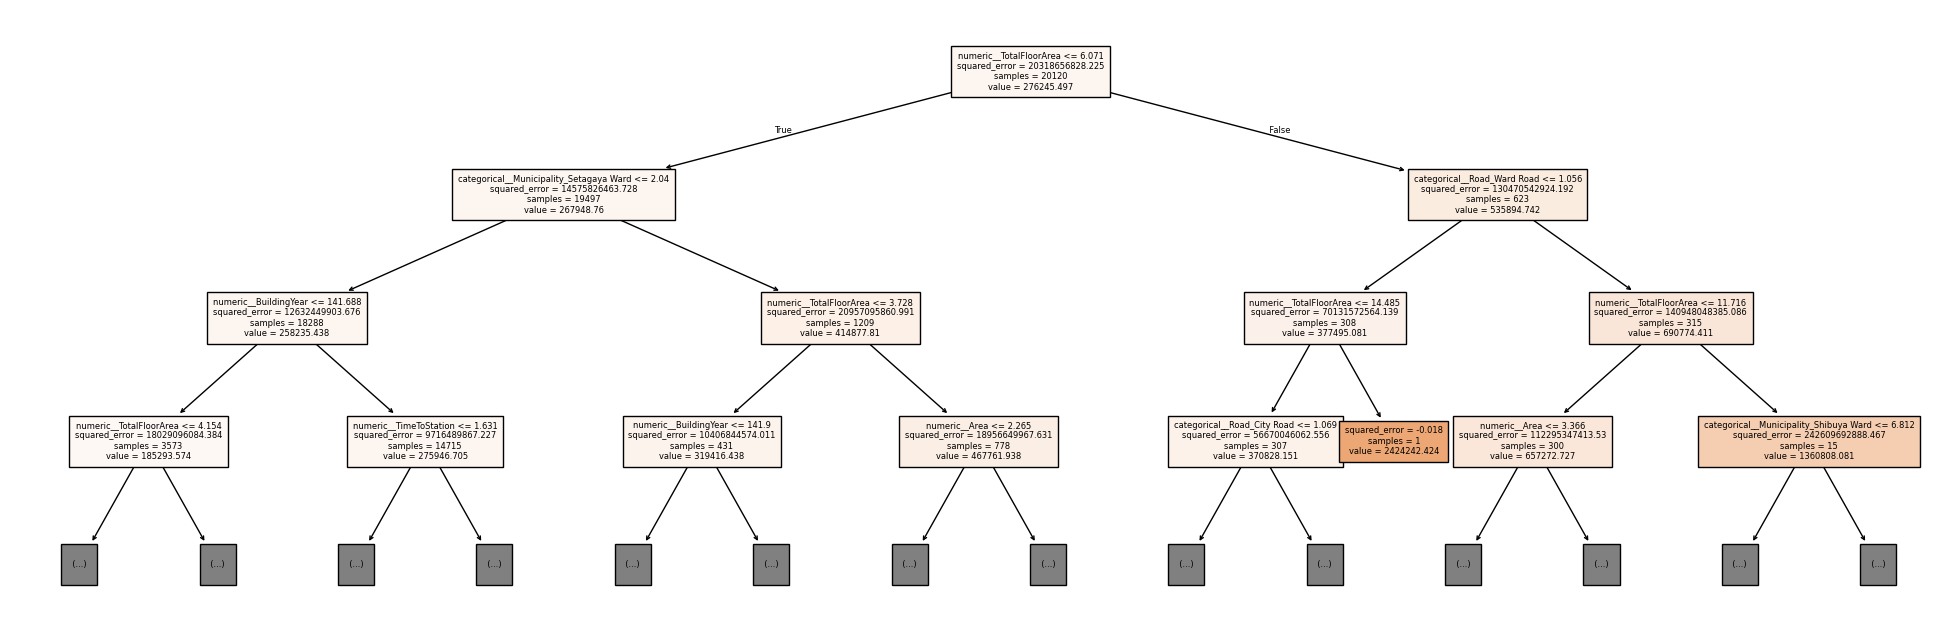

In [265]:
plt.figure(figsize=(25, 8))
plot_tree(tokyo_model.named_steps["decision_tree"], max_depth=3, 
          feature_names=tokyo_model["preprocessing"].get_feature_names_out(), 
          fontsize=6, filled=True);
plt.show()

Tramite il campo `filled` del metodo `plot_tree` è possibile vedere come la foglia con la tonalità più forte sia molto pura. Definisce quanto sono simili i dati tra loro (in questo caso è un unico campione), quindi si tende ad avere una varianza più piccola poichè i valori sono più vicini alla media.

In [268]:
show_metrics(X_train, Y_train, tokyo_model, RMSPE=True)

Valori delle metriche:
1) Mean squared error: 397979.4329
2) Relative error: 0.0122618128%
3) R-squared coefficient: 0.9999804131
4) RMSPE: 0.6734926915


In [270]:
show_metrics(X_test, Y_test, tokyo_model, RMSPE=True)

Valori delle metriche:
1) Mean squared error: 1.295340811e+10
2) Relative error: 25.1217430842%
3) R-squared coefficient: 0.4085501387
4) RMSPE: 0.6734926915


In [272]:
pd.Series(tokyo_model.named_steps["decision_tree"].feature_importances_, 
          index=tokyo_model["preprocessing"].get_feature_names_out()).sort_values(ascending=False).head(10)

numeric__TotalFloorArea                   0.235
numeric__BuildingYear                     0.114
numeric__TimeToStation                    0.092
numeric__Area                             0.072
categorical__Municipality_Setagaya Ward   0.069
categorical__Road_Ward Road               0.048
numeric__Frontage                         0.036
numeric__Year                             0.034
categorical__Municipality_Meguro Ward     0.025
numeric__Breadth                          0.024
dtype: float64

E' interessante notare come le feature più importanti per il `DecisionTree` non siano solamente quelle appartenenti alla sezione `Municipality`. I tre parametri con maggiore impatto risultano essere:
1) la `TotalFloorArea`, l'area totale dell'edificio;
2) il `BuildingYear`, l'anno di costruzione;
3) il `TimeToStation`, il tempo necessario a raggiungere la stazione.

Sono caratteristiche molto valutate nell'acquisto di una nuova casa.

Inoltre, dagli esempi sopra presenti si può notare come l'albero stia overfittando i dati, quindi generalizza poco su nuovi campioni, in genere è una caratteristica comune degli alberi. Si adatta troppo bene ai dati passati durante la fase di addestramento. Per ridurre il problema è possibile:
* limitare la profondità massima dell'albero così che non diventi troppo complesso;
* impostare un numero di campioni minimo per nodo foglia;
* impostare un numero di campioni minimo per effettuare lo splitting;
* usare anche la cross validation.

#### Random Forest

Un'altro algoritmo basato sugli alberi è il **Random Forest**, un modello che crea tanti alberi decisionali in parallelo partendo da subset non disgiunti dai dati di partenza. Viene considerato uno tra gli algoritmi più efficienti per i dati tabulari e viene utilizzato tramite l'oggetto `RandomForestRegressor`. In seguito viene analizzato per capire se possa effettivamente migliorare le prestazioni del modello.

In [277]:
from sklearn.ensemble import RandomForestRegressor

In [287]:
%%time

transformer = ColumnTransformer([
    ("numeric", "passthrough", numeric_columns),
    ("categorical", OneHotEncoder(sparse_output=False, handle_unknown="infrequent_if_exist"), categorical_columns),
    ("boolean", "passthrough", boolean_columns)
])

tokyo_model = Pipeline([
    ("preprocessing", transformer),
    ("scaler", StandardScaler(with_mean=False)),
    ("random_forest", RandomForestRegressor(max_depth=None, n_jobs=-1))
]) # max_samples=1.0, max_features="sqrt", n_estimators=2000

tokyo_model.fit(X_train, Y_train)
tokyo_model.score(X_train, Y_train)

CPU times: total: 30 s
Wall time: 2.16 s


0.9639540529800228

In [289]:
show_metrics(X_train, Y_train, tokyo_model, RMSPE=True)

Valori delle metriche:
1) Mean squared error: 732405227.5
2) Relative error: 7.0057412223%
3) R-squared coefficient: 0.963954053
4) RMSPE: 0.9055728475


In [291]:
show_metrics(X_test, Y_test, tokyo_model, RMSPE=True)

Valori delle metriche:
1) Mean squared error: 5.81072612e+09
2) Relative error: 19.6496675269%
3) R-squared coefficient: 0.7346834803
4) RMSPE: 0.9055728475


In [293]:
pd.Series(tokyo_model.named_steps["random_forest"].feature_importances_, 
          index=tokyo_model["preprocessing"].get_feature_names_out()).sort_values(ascending=False).head(10)

numeric__TotalFloorArea                   0.235
numeric__BuildingYear                     0.112
numeric__TimeToStation                    0.090
numeric__Area                             0.077
categorical__Municipality_Setagaya Ward   0.070
numeric__Frontage                         0.043
categorical__Road_Ward Road               0.039
numeric__Breadth                          0.026
categorical__Municipality_Meguro Ward     0.024
categorical__Municipality_Suginami Ward   0.024
dtype: float64

Le principali feature sono molto simili a quelle previste dal modello con il singolo albero decisionale. Anche in questo caso il modello non generalizza bene su nuovi dati, anche se la situazione risulta migliore rispetto al singolo albero decisionale. In questo caso è possibile intervenire su determinati iperparametri al fine di limitare il fenomeno: 
* `n_estimators` -> aumentando il numero di alberi si riduce la possibilità di overfitting;
* `max_features` -> limitando il numero di feature presenti in ogni albero (ridurre troppo può causare underfitting);
* `max_depth` -> definendo una profondità massima si limita la complessità del modello;
* `min_samples_leaf` -> aumentando il numero di campioni necessari per far sì che un nodo diventi foglia (limitando la profondità).

Un grande vantaggio che si è riscontrato con modelli basati su alberi è che tendono a restituire feature con coefficienti **molto bassi**!

### LightGBM

LightGBM è una framework gradient boosting messo a disposizione da Microsoft che utilizza algoritmi basati sugli alberi. Garantisce una maggiore efficienza, velocità di training e basso utilizzo di memoria.

In [299]:
# Si installa la libreria tramite il seguente comando
%pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [301]:
# Si importa il modello di regressione
from lightgbm import LGBMRegressor
# Si sopprimono i warning restituiti
import warnings
warnings.filterwarnings("ignore")

In [303]:
%%time

transformer = ColumnTransformer([
    ("numeric", "passthrough", numeric_columns),
    ("categorical", OneHotEncoder(sparse_output=False, handle_unknown="infrequent_if_exist"), categorical_columns),
    ("boolean", "passthrough", boolean_columns)
])

tokyo_model = Pipeline([
    ("preprocessing", transformer),
    ("scaler", StandardScaler(with_mean=False)),
    ("lightgbm", LGBMRegressor())
])

tokyo_model.fit(X_train, Y_train)
tokyo_model.score(X_train, Y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 20120, number of used features: 81
[LightGBM] [Info] Start training from score 276245.497621
CPU times: total: 1.19 s
Wall time: 288 ms


0.8519710805397241

In [305]:
show_metrics(X_train, Y_train, tokyo_model, RMSPE=True)

Valori delle metriche:
1) Mean squared error: 3.007748815e+09
2) Relative error: 16.0633678962%
3) R-squared coefficient: 0.8519710805
4) RMSPE: 0.5884267384


In [307]:
show_metrics(X_test, Y_test, tokyo_model, RMSPE=True)

Valori delle metriche:
1) Mean squared error: 4.705321575e+09
2) Relative error: 17.8854846744%
3) R-squared coefficient: 0.7851560168
4) RMSPE: 0.5884267384


In [309]:
pd.Series(
    tokyo_model.named_steps["lightgbm"].feature_importances_, 
    index=tokyo_model["preprocessing"].get_feature_names_out()).sort_values(ascending=False).head(10)

numeric__TotalFloorArea                    343
numeric__Area                              313
numeric__BuildingYear                      236
numeric__TimeToStation                     219
numeric__Frontage                          162
numeric__Breadth                           123
numeric__FloorAreaRatio                     84
numeric__Year                               73
categorical__Municipality_Setagaya Ward     66
categorical__Municipality_Suginami Ward     57
dtype: int32

LightGBM resituisce, in modo simile, le feature ottenute con metodi basati sugli alberi, ma i coefficienti sono molto più elevati e questi possono influenzano notevolmente le scelte del modello, però riesce a generalizzare meglio anche su dati nuovi. LightGBM mostra prestazioni migliori in quanto la metrica RMSPE restituisce valori più piccoli degli altri modelli con alberi, quindi i valori predetti dal modello sono più simili a quelli reali (o per lo meno ci si avvicinano).

### XGBoost

L'ultimo tipo di modello che viene preso in considerazione è quello introdotto dalla libreria xgboost che utilizza alberi decisionali potenziati dal gradiente. Tramite *boosting* si riesce a creare modelli più robusti poichè gli alberi decisionali sono inclini all'overfitting.

In [315]:
# Si installa la libreria
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [317]:
import xgboost
# Si controlla la versione installata di xgboost
print(xgboost.__version__)

3.0.0


In [319]:
from xgboost import XGBRegressor

In [321]:
%%time
transformer = ColumnTransformer([
    ("numeric", "passthrough", numeric_columns),
    ("categorical", OneHotEncoder(sparse_output=False, handle_unknown="infrequent_if_exist"), categorical_columns),
    ("boolean", "passthrough", boolean_columns)
])

tokyo_model = Pipeline([
    ("preprocessing", transformer),
    ("scaler", StandardScaler(with_mean=False)),
    ("xgbregressor", XGBRegressor(objective='reg:squarederror', 
                                   reg_alpha=0.0, 
                                   reg_lambda=1, 
                                   n_estimators=2000))
])

tokyo_model.fit(X_train, Y_train)
tokyo_model.score(X_train, Y_train)

CPU times: total: 33.6 s
Wall time: 2.3 s


0.9989589148475436

In [323]:
show_metrics(X_test, Y_test, tokyo_model, RMSPE=True)

Valori delle metriche:
1) Mean squared error: 4.763975358e+09
2) Relative error: 18.2912262499%
3) R-squared coefficient: 0.7824778976
4) RMSPE: 0.7436472528


In [325]:
show_metrics(X_train, Y_train, tokyo_model, RMSPE=True)

Valori delle metriche:
1) Mean squared error: 21153451.94
2) Relative error: 1.1996000960%
3) R-squared coefficient: 0.9989589148
4) RMSPE: 0.7436472528


In [327]:
pd.Series(
    tokyo_model.named_steps["xgbregressor"].feature_importances_, 
    index=tokyo_model["preprocessing"].get_feature_names_out()).sort_values(ascending=False).head(10)

categorical__Municipality_Minato Ward      0.113
categorical__Municipality_Meguro Ward      0.095
categorical__Municipality_Shibuya Ward     0.089
categorical__Road_Ward Road                0.061
categorical__Municipality_Musashino City   0.055
categorical__Municipality_Bunkyo Ward      0.046
categorical__Municipality_Oume City        0.036
categorical__Municipality_Setagaya Ward    0.035
categorical__Municipality_Akiruno City     0.035
categorical__Municipality_Shinagawa Ward   0.031
dtype: float32

Il modello tende molto all'overfitting con prestazioni peggiori rispetto a LightGBM, ma i coefficienti ricavati hanno dimensioni molto inferiore. Inoltre, i parametri principali sono gli stessi che sono stati ricavati dal modelli lineari.

___
### Multi-layer Perceptron

Questa sezione è stata aggiunta per analizzare la potenza di modelli di rete neurali quali il multi-layer perceptron, allenato mediante backpropagation (metodo utilizzato per l'aggiornamento dei pesi). La rete si compone di tre o più layer (sezioni): *input*, *output* e *hidden*. Tramite discesa del gradiente si minimizza l'errore.   
In questo esempio, si è creata una rete costituita da 4 *layers nascosti* e *batch size* uguale a 50, quest'ultimo iperparametro rappresenta il numero di campioni che devono essere utilizzati dal modello ad ogni passo.

In [333]:
from sklearn.neural_network import MLPRegressor

In [436]:
%%time

transformer = ColumnTransformer([
    ("numeric", "passthrough", numeric_columns),
    ("categorical", OneHotEncoder(sparse_output=False, handle_unknown="infrequent_if_exist"), categorical_columns),
    ("boolean", "passthrough", boolean_columns)
])

tokyo_model = Pipeline([
    ("preprocessing", transformer),
    ("scaler", StandardScaler(with_mean=False)),
    ("mlp", MLPRegressor(hidden_layer_sizes=4, max_iter=4000, batch_size=50, random_state=42))
])

tokyo_model.fit(X_train, Y_train)
tokyo_model.score(X_train, Y_train)

CPU times: total: 27min 29s
Wall time: 3min 27s


0.6648795568299044

In [439]:
show_metrics(X_test, Y_test, tokyo_model, RMSPE=True)

Valori delle metriche:
1) Mean squared error: 7.336209264e+09
2) Relative error: 27.9409695953%
3) R-squared coefficient: 0.6650302441
4) RMSPE: 0.9822923225


In [441]:
show_metrics(X_train, Y_train, tokyo_model, RMSPE=True)

Valori delle metriche:
1) Mean squared error: 6.809197281e+09
2) Relative error: 27.6721270090%
3) R-squared coefficient: 0.6648795568
4) RMSPE: 0.9822923225


Dai risultati si evince come il modello necessiti di maggiore tempo per l'addestramento, è più resource consuming e allo stato attuale (per come sono stati impostati gli iperparametri) ha prestazioni inferiori rispetto ai modelli precedenti. Una nota positiva è che riesce a generalizzare bene i dati, anche quelli mai avvistati.

___
### Scelta dei modelli e ricerca degli iperparametri

Dopo aver addestrato più modelli e confrontato tra loro  i risultati restituiti, si è deciso di effettuare una ricerca più approfondita degli iperparametri così da ottimizzare le prestazioni. I tre modelli su cui verrà eseguita l'analisi sono:
* Regressione Ridge con filtro polinomiale;
* Random Forest;
* XGBoost.

Per avere una più accurata valutazione dei modelli, al posto del metodo **Hold-Out** che porta una singola suddivisione delle osservazioni, viene utilizzata la **Cross Validation** in *k-fold*. Questa tecnica permette di suddividere i dati di partenza in più gruppi, ognuno dei quali svolge la funzione di *validation set* mentre i restanti svolgono il ruolo di *training set*, aiutando il modello ad apprendere. Questo procedimento è ripetuto per ogni singolo subset. Si inizia importando `KFold`.

In [338]:
from sklearn.model_selection import KFold

In [340]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

Inoltre, per individuare i parametri più efficienti, coloro che massimizzano l'accuratezza, ci si affida al modello `GridSearchCV` che al tempo stesso esegue la cross validation.

In [343]:
from sklearn.model_selection import GridSearchCV

In [345]:
# Restituisce i primi 5 risultati ottenuti dalla GridSearch
def gs_results(model):
    return pd.DataFrame(model.cv_results_).sort_values("rank_test_score").head()

**ATTENZIONE**  
La ricerca degli iperparametri tramite `GridSearch`, in questi esempi richiede molto tempo (si è provato ad effettuare una ricerca esaustiva).
___

#### Ricerca su Ridge con filtro polinomiale

Come primo caso di ricerca si è deciso di partire con la regressione **Ridge polinomiale**. Questa scelta è stata data dal fatto che, anche se il modello con *Lasso* permetta di ottenere risultati simile al *Ridge* con numero inferiore di campi, questo procedimento richiedeva molto tempo aggiuntivo ed era necessario apportare modifiche al numero di iterazioni per convergere al fine di ottenere risultati.

In questa analisi sono stati messi a confronto valori diversi per alcuni iperparametri quali:
* `alpha`: con quanta forza applicare la regolarizzazione per limitare coefficienti elevati;
* `max_iter`: numero di iterazioni necessario all'addestramento;
* `degree`: il grado del filtro polinomiale da applicare, quindi quanto rendere complesso il modello;
* `drop`: se lasciare cadere una categoria per feature (può causare delle previsioni incorrette).

In [400]:
%%time

transformer = ColumnTransformer([
    ("numeric", PolynomialFeatures(include_bias=False), numeric_columns),
    ("categorical", OneHotEncoder(sparse_output=False, handle_unknown="infrequent_if_exist"), categorical_columns),
    ("boolean", "passthrough", boolean_columns)
])
    
tokyo_model = Pipeline([
    ("preprocessing", transformer),
    ("scaler", StandardScaler(with_mean=False)),
    ("ridge" , Ridge())
])

grid_ridge = {
    "ridge__alpha": [1, 10, 100],
    "ridge__max_iter": [1000, 2000, 4000],
    "preprocessing__numeric__degree": [1, 2, 3, 4],
    "preprocessing__categorical__drop": [None, "first"]
}

gs_ridge = GridSearchCV(tokyo_model, grid_ridge, cv=kfold)
gs_ridge.fit(X_train, Y_train)

gs_ridge.best_params_

CPU times: total: 12min 7s
Wall time: 1min 55s


{'preprocessing__categorical__drop': None,
 'preprocessing__numeric__degree': 3,
 'ridge__alpha': 1,
 'ridge__max_iter': 1000}

In [402]:
gs_results(gs_ridge)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__categorical__drop,param_preprocessing__numeric__degree,param_ridge__alpha,param_ridge__max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
20,0.244,0.007,0.031,0.001,None,3,1,4000,"{'preprocessing__categorical__drop': None, 'pr...",0.664,0.759,0.723,0.760,0.743,0.730,0.035,1
19,0.243,0.010,0.030,0.004,None,3,1,2000,"{'preprocessing__categorical__drop': None, 'pr...",0.664,0.759,0.723,0.760,0.743,0.730,0.035,1
18,0.239,0.009,0.030,0.003,None,3,1,1000,"{'preprocessing__categorical__drop': None, 'pr...",0.664,0.759,0.723,0.760,0.743,0.730,0.035,1
54,0.208,0.008,0.027,0.003,first,3,1,1000,"{'preprocessing__categorical__drop': 'first', ...",0.664,0.760,0.723,0.760,0.743,0.730,0.036,4
55,0.223,0.006,0.030,0.001,first,3,1,2000,"{'preprocessing__categorical__drop': 'first', ...",0.664,0.760,0.723,0.760,0.743,0.730,0.036,4


In [404]:
show_metrics(X_test, Y_test, gs_ridge)

Valori delle metriche:
1) Mean squared error: 5.671872577e+09
2) Relative error: 21.4104459104%
3) R-squared coefficient: 0.7410235035


In [406]:
show_metrics(X_train, Y_train, gs_ridge)

Valori delle metriche:
1) Mean squared error: 4.885792796e+09
2) Relative error: 19.5081919040%
3) R-squared coefficient: 0.7595415466


Rispetto ai risultati ricavati precedentemente, con i parametri ottimali, le metriche sul *training set* e sul *validation set* sono migliorate. Inoltre, la ricerca è stata eseguita molto velocemente a differenza di una prova non mostrata con il modello `Lasso` (circa 40 minuti totali necessari al completamento e con risultati peggiori di quelli mostrati sopra), il quale richiedeva molte più iterazioni per riuscire a convergere.

___
#### Ricerca su Random Forest

Il primo caso di studio relativo alla Random Forest mostrava come il modello si adattasse bene, anche fin troppo, ai dati passati durante la fase di training. Al fine di ridurre l'overfitting si è deciso di analizzare la foresta su alcuni iperparametri che potessero ridurre o smorzare l'effetto di questo fenomeno. Sono state prese in considerazione:
* `max_depth`, al fine di limitare la profondità. Sono stati scelti un'insieme di valori piccoli così da ridurne la complessità e rendere il modello più generale;
* `max_feature`, definire un sottoinsieme delle feature che devono essere analizzate in ogni estimatore. In questo caso si è deciso di porre la scelta tra: tutte le feature (*1.0*) e la radice del numero di caratteristiche;
* `min_samples_leaf`, numero di campioni minimo presenti al fine di rendere un nodo una foglia;
* `n_estimators`, aumentare il numero di alberi che costituiscono la foresta;

In [176]:
%%time

transformer = ColumnTransformer([
    ("numeric", StandardScaler(), numeric_columns),
    ("categorical", OneHotEncoder(handle_unknown="infrequent_if_exist"), categorical_columns),
    ("boolean", "passthrough", boolean_columns)
])

tokyo_model = Pipeline([
    ("preprocessing", transformer),
    ("random_forest", RandomForestRegressor(n_jobs=-1))
]) # max_samples=1.0, max_features="sqrt", n_estimators=2000

grid_forest = {
    "random_forest__max_depth": [3, 5, 10, 20],
    "random_forest__max_features": [1.0, "sqrt"],
    "random_forest__min_samples_leaf": [1, 3, 5],
    "random_forest__n_estimators": [200, 1000, 2000],
}

gs_forest = GridSearchCV(tokyo_model, grid_forest, cv=kfold)
gs_forest.fit(X_train, Y_train)

gs_forest.best_params_

CPU times: total: 14h 6min 49s
Wall time: 1h 3min 17s


{'random_forest__max_depth': 20,
 'random_forest__max_features': 1.0,
 'random_forest__min_samples_leaf': 1,
 'random_forest__n_estimators': 1000}

In [490]:
gs_results(gs_forest)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__min_samples_leaf,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
55,60.826,0.712,0.402,0.014,20,1.000,1,1000,"{'random_forest__max_depth': 20, 'random_fores...",0.658,0.721,0.745,0.758,0.698,0.716,0.036,1
56,120.840,1.137,0.910,0.026,20,1.000,1,2000,"{'random_forest__max_depth': 20, 'random_fores...",0.656,0.720,0.744,0.756,0.699,0.715,0.036,2
54,11.950,0.545,0.094,0.003,20,1.000,1,200,"{'random_forest__max_depth': 20, 'random_fores...",0.654,0.717,0.742,0.757,0.696,0.713,0.036,3
57,7.662,0.443,0.092,0.006,20,1.000,3,200,"{'random_forest__max_depth': 20, 'random_fores...",0.646,0.711,0.740,0.737,0.686,0.704,0.035,4
59,67.798,1.024,0.834,0.018,20,1.000,3,2000,"{'random_forest__max_depth': 20, 'random_fores...",0.646,0.709,0.742,0.738,0.686,0.704,0.035,5


In [492]:
show_metrics(X_test, Y_test, gs_forest, RMSPE=True)

Valori delle metriche:
1) Mean squared error: 6.240491935e+09
2) Relative error: 22.0316034696%
3) R-squared coefficient: 0.7150604645
4) RMSPE: 1.041636736


In [494]:
show_metrics(X_train, Y_train, gs_forest, RMSPE=True)

Valori delle metriche:
1) Mean squared error: 1.74919766e+09
2) Relative error: 13.8793008157%
3) R-squared coefficient: 0.9139117475
4) RMSPE: 1.041636736


Dai risultati si può notare come le metriche siano effettivamente peggiorate per i dati di *training*, riducendo il gap presente con le variabili del *validation set*. Questo mostra come il modello con una profondità **non definita** porti risultati estremamente soddisfacenti per il training set, ma peggiori su dati nuovi. Da questo si può capire come la profondità influisca enormemente su un modello infatti, dalla tabella con le migliori combinazioni di iperparametri, le scelte migliori hanno come profondità il valore massimo impostato.

___
#### Ricerca su XGBoost

Per concludere, come ultimo modello per la ricerca degli iperparametri ottimali, è stato preso in considerazione **XGBoost** perchè i risultati ottenuti sul *validation set* sono stati i migliori nonostante la *forte* presenza di overfitting (si voleva indagare su eventuali iperparametri che potessero migliorare le prestazioni del modello).  
Siccome anche XGBoost è un'algoritmo che si basa sugli alberi decisionali, sono presenti alcuni iperparametri utili al fine di ridurre l'overfitting:
* `max_depth`, la profondità massima;
* `n_estimators`, numero di alberi utilizzati per l'addestramento.   

Inoltre, sono stati utilizzati altri due iperparametri interessanti, quali:
1) `reg_alpha`: per applicare la regolarizzazione L1;
2) `reg_lambda`: per applicare la regolarizzazione L2.

In [161]:
%%time

transformer = ColumnTransformer([
    ("numeric", StandardScaler(), numeric_columns),
    ("categorical", OneHotEncoder(handle_unknown="infrequent_if_exist"), categorical_columns),
    ("boolean", "passthrough", boolean_columns)
])

tokyo_model = Pipeline([
    ("preprocessing", transformer),
    ("xgbregressor", XGBRegressor(objective='reg:squarederror'))
])

grid_xgb = {
    "xgbregressor__reg_alpha": [0.0, 0.5, 1],
    "xgbregressor__reg_lambda": [0, 1, 10],
    "xgbregressor__max_depth": [5, 10, 20],
    "xgbregressor__n_estimators": [200, 1000, 2000]
}

gs_xgb = GridSearchCV(tokyo_model, grid_xgb, cv=kfold)
gs_xgb.fit(X_train, Y_train)
print("GridSearch Terminata !!!")

GridSearch Terminata !!!
CPU times: total: 10h 32min 24s
Wall time: 45min 10s


In [164]:
gs_xgb.best_params_

{'xgbregressor__max_depth': 5,
 'xgbregressor__n_estimators': 200,
 'xgbregressor__reg_alpha': 0.5,
 'xgbregressor__reg_lambda': 10}

In [166]:
gs_results(gs_xgb)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbregressor__max_depth,param_xgbregressor__n_estimators,param_xgbregressor__reg_alpha,param_xgbregressor__reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.207,0.031,0.023,0.003,5,200,0.500,10,"{'xgbregressor__max_depth': 5, 'xgbregressor__...",0.727,0.815,0.805,0.799,0.791,0.787,0.031,1
2,0.240,0.015,0.026,0.002,5,200,0.000,10,"{'xgbregressor__max_depth': 5, 'xgbregressor__...",0.727,0.815,0.805,0.799,0.791,0.787,0.031,2
8,0.212,0.026,0.023,0.002,5,200,1.000,10,"{'xgbregressor__max_depth': 5, 'xgbregressor__...",0.727,0.815,0.805,0.799,0.791,0.787,0.031,3
7,0.229,0.047,0.023,0.003,5,200,1.000,1,"{'xgbregressor__max_depth': 5, 'xgbregressor__...",0.723,0.817,0.808,0.796,0.787,0.786,0.033,4
17,0.981,0.075,0.049,0.003,5,1000,1.000,10,"{'xgbregressor__max_depth': 5, 'xgbregressor__...",0.728,0.813,0.801,0.796,0.791,0.786,0.030,5


In [170]:
show_metrics(X_test, Y_test, gs_xgb, RMSPE=True)

Valori delle metriche:
1) Mean squared error: 4.38717544e+09
2) Relative error: 17.2003105614%
3) R-squared coefficient: 0.7996825018
4) RMSPE: 0.4830785124


In [172]:
show_metrics(X_train, Y_train, gs_xgb, RMSPE=True)

Valori delle metriche:
1) Mean squared error: 2.26089019e+09
2) Relative error: 13.5362339728%
3) R-squared coefficient: 0.8887283638
4) RMSPE: 0.4830785124


Il modello tramite gli iperparametri ottimali è riuscito a migliorare molto le prestazioni e i risultati delle metriche (sopratutto il valore del RMSPE si è ridotto molto). **XGBoost è il migliore tra i modelli analizzati**.

Inoltre, sia il modello con la Foresta che XGBoost hanno richiesto un tempo maggiore rispetto al modello di regressione non lineare Ridge.

___
### Conclusioni

Con la precedente analisi effettuata tramite la `GridSearch`, si è riuscito ad ottenere gli **iperparametri** ottimali che minimizzano l'errore e massimizzano le prestazioni. Per concludere si è deciso di prendere il modello con `XGBoost`, applicandogli i migliori parametri restituito dalla ricerca, per predire il prezzo di un'ipotetica abitazione.

In [350]:
import random

In [352]:
# Funzione che mi restituisce un valore randomico presente tra gli attributi validi
# presenti in una determinata colonna scelta.
def get_random_choice(column):
    return random.choice(X[column].value_counts().keys())

La mia ipotetica casa avrà i seguenti campi:

In [355]:
house_dict = {
    "Region": get_random_choice("Region"),
    "Municipality": get_random_choice("Municipality"),
    "TimeToStation": 20,
    "Area": 100,
    "LandShape": get_random_choice("LandShape"),
    "Frontage": 10,
    "TotalFloorArea": 150,
    "BuildingYear": 2018,
    "PrewarBuilding": False,
    "Structure": get_random_choice("Structure"),
    "Road": get_random_choice("Road"),
    "Breadth": 3.5,
    "CoverageRatio": 100,
    "FloorAreaRatio": 150,
    "Year": 2022,
    "Quarter": 2
}

In [357]:
house = pd.DataFrame(data=house_dict, index=[0])
house

,Region,Municipality,TimeToStation,Area,LandShape,Frontage,TotalFloorArea,BuildingYear,PrewarBuilding,Structure,Road,Breadth,CoverageRatio,FloorAreaRatio,Year,Quarter
0,Industrial Area,Mitaka City,20,100,Flag-shaped etc.,10,150,2018,False,S,Kyoto/ Osaka Prefectural Road,3.500,100,150,2022,2


In [359]:
# Modello XGBoost con iperparametri scelti tramite GridSearch
transformer = ColumnTransformer([
    ("numeric", StandardScaler(), numeric_columns),
    ("categorical", OneHotEncoder(handle_unknown="infrequent_if_exist"), categorical_columns),
    ("boolean", "passthrough", boolean_columns)
])

tokyo_model = Pipeline([
    ("preprocessing", transformer),
    ("xgbregressor", XGBRegressor(objective='reg:squarederror', 
                                  max_depth=5, 
                                  n_estimators=200, 
                                  reg_alpha=0.5, 
                                  reg_lambda=10))
])
tokyo_model.fit(X_train, Y_train)

print("Il punteggio del modello è: ", tokyo_model.score(X_train, Y_train))
print("La casa ha un valore di: ", tokyo_model.predict(house)[0], "€")

Il punteggio del modello è:  0.8887283638321394
La casa ha un valore di:  401906.9 €


In conclusione, il progetto è stato un'ottima opportunità, anche dal punto di visto formativo, per confrontare tra loro diversi modelli e i loro approcci su un contesto specifico come il calcolo del prezzo di un'immobile nella città di Tokyo. 